In [1]:
# %pip install tensorflow
# %pip install xgboost
# %pip install coremltools
# %pip install tf2onnx onnx

# %pip uninstall tensorflow tensorflow-gpu numpy -y

# Install compatible versions in order
%pip install tensorflow-macos==2.12.0
%pip install coremltools
%pip install scikit-learn 
%pip matplotlib seaborn pandas joblib


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200.8/200.8 MB 12.3 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 30.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.4/13.4 MB 33.5 MB/s eta 0:00:00 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.6/5.6 MB 32.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 29.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.7/66.7 MB 34.3 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)), # Input layer with 784 features
    layers.Dropout(0.2), # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Load MNIST dataset for training/evaluation
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')


AttributeError: module 'numpy' has no attribute 'dtypes'

In [ ]:
# Facial Landmark Classification for Face Shape Recognition
# Enhanced ML Pipeline with Core ML Conversion for iOS/Swift Integration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Core ML conversion imports
try:
    import coremltools as ct
    COREML_AVAILABLE = True
    print("‚úÖ Core ML Tools available for conversion")
except ImportError:
    COREML_AVAILABLE = False
    print("‚ö†Ô∏è Core ML Tools not available. Install with: pip install coremltools")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# ==================== ENHANCED DATA LOADING AND PREPROCESSING ====================

def load_and_preprocess_data(train_file, test_file):
    """Load and preprocess the facial landmark data with enhanced validation"""

    print("Loading datasets...")
    try:
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
    except FileNotFoundError as e:
        print(f"‚ùå File not found: {e}")
        return None, None, None, None, None

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

    # Check for missing values
    print(f"\nMissing values in training set: {train_df.isnull().sum().sum()}")
    print(f"Missing values in testing set: {test_df.isnull().sum().sum()}")

    # Display label distribution
    print("\nTraining set label distribution:")
    label_counts = train_df['label'].value_counts()
    print(label_counts)

    # Check for class imbalance
    min_class_count = label_counts.min()
    max_class_count = label_counts.max()
    imbalance_ratio = max_class_count / min_class_count
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

    if imbalance_ratio > 3:
        print("‚ö†Ô∏è Significant class imbalance detected. Consider data augmentation or class weighting.")

    # Separate features and labels
    feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]

    X_train = train_df[feature_cols].values
    y_train = train_df['label'].values
    X_test = test_df[feature_cols].values
    y_test = test_df['label'].values

    # Data validation
    print(f"\nFeature matrix shape: {X_train.shape}")
    print(f"Number of landmark coordinates: {len(feature_cols)}")
    print(f"Expected 68 landmarks (136 coordinates): {'‚úÖ' if len(feature_cols) == 136 else '‚ùå'}")

    # Check for outliers (landmarks should be normalized coordinates)
    print(f"Feature range - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}")

    return X_train, y_train, X_test, y_test, feature_cols

# ==================== ENHANCED FEATURE ENGINEERING ====================

def engineer_features(X_train, X_test):
    """Create additional geometric features from landmark coordinates"""

    # Reshape landmarks to (n_samples, 68, 2) for easier manipulation
    n_landmarks = X_train.shape[1] // 2

    X_train_reshaped = X_train.reshape(-1, n_landmarks, 2)
    X_test_reshaped = X_test.reshape(-1, n_landmarks, 2)

    def extract_enhanced_geometric_features(landmarks):
        """Extract comprehensive geometric features for face shape analysis"""
        features = []

        # Basic face dimensions
        face_width = np.max(landmarks[:, :, 0], axis=1) - np.min(landmarks[:, :, 0], axis=1)
        face_height = np.max(landmarks[:, :, 1], axis=1) - np.min(landmarks[:, :, 1], axis=1)
        width_height_ratio = face_width / (face_height + 1e-8)

        # Jaw line analysis (landmarks 0-16)
        jaw_landmarks = landmarks[:, 0:17, :]
        jaw_width = np.max(jaw_landmarks[:, :, 0], axis=1) - np.min(jaw_landmarks[:, :, 0], axis=1)
        jaw_curvature = np.std(jaw_landmarks[:, :, 1], axis=1)  # Measure jaw curvature

        # Cheekbone analysis (landmarks around cheek area)
        # Approximate cheekbone width using outer eye corners and face edges
        left_cheek_x = landmarks[:, 0, 0]   # Left jaw point
        right_cheek_x = landmarks[:, 16, 0]  # Right jaw point
        cheekbone_width = right_cheek_x - left_cheek_x

        # Forehead analysis
        eyebrow_landmarks = landmarks[:, 17:27, :]  # Eyebrow landmarks
        forehead_width = np.max(eyebrow_landmarks[:, :, 0], axis=1) - np.min(eyebrow_landmarks[:, :, 0], axis=1)

        # Eye region analysis
        left_eye = landmarks[:, 36:42, :]   # Left eye landmarks
        right_eye = landmarks[:, 42:48, :]  # Right eye landmarks
        eye_distance = np.mean(right_eye[:, :, 0], axis=1) - np.mean(left_eye[:, :, 0], axis=1)

        # Nose analysis
        nose_landmarks = landmarks[:, 27:36, :]
        nose_width = np.max(nose_landmarks[:, :, 0], axis=1) - np.min(nose_landmarks[:, :, 0], axis=1)
        nose_length = np.max(nose_landmarks[:, :, 1], axis=1) - np.min(nose_landmarks[:, :, 1], axis=1)

        # Mouth analysis
        mouth_landmarks = landmarks[:, 48:68, :]
        mouth_width = np.max(mouth_landmarks[:, :, 0], axis=1) - np.min(mouth_landmarks[:, :, 0], axis=1)

        # Centroid and symmetry features
        centroid_x = np.mean(landmarks[:, :, 0], axis=1)
        centroid_y = np.mean(landmarks[:, :, 1], axis=1)

        # Face symmetry (compare left and right halves)
        left_points = landmarks[:, :, 0] < centroid_x[:, np.newaxis]
        right_points = landmarks[:, :, 0] > centroid_x[:, np.newaxis]

        # Calculate asymmetry as difference in standard deviations
        asymmetry_score = np.zeros(landmarks.shape[0])
        for i in range(landmarks.shape[0]):
            left_coords = landmarks[i, left_points[i], 0]
            right_coords = landmarks[i, right_points[i], 0]
            if len(left_coords) > 0 and len(right_coords) > 0:
                asymmetry_score[i] = abs(np.std(left_coords) - np.std(right_coords))

        # Distance-based features
        distances = np.sqrt((landmarks[:, :, 0] - centroid_x[:, np.newaxis])**2 +
                           (landmarks[:, :, 1] - centroid_y[:, np.newaxis])**2)
        mean_distance = np.mean(distances, axis=1)
        std_distance = np.std(distances, axis=1)
        max_distance = np.max(distances, axis=1)

        # Ratios important for face shape classification
        jaw_to_forehead_ratio = jaw_width / (forehead_width + 1e-8)
        eye_to_face_ratio = eye_distance / (face_width + 1e-8)
        nose_to_face_ratio = nose_width / (face_width + 1e-8)
        mouth_to_face_ratio = mouth_width / (face_width + 1e-8)

        # Additional geometric ratios
        face_aspect_ratio = face_height / (face_width + 1e-8)
        jaw_to_face_ratio = jaw_width / (face_width + 1e-8)

        # Compile all features
        feature_list = [
            face_width, face_height, width_height_ratio,
            jaw_width, jaw_curvature, cheekbone_width,
            forehead_width, eye_distance, nose_width, nose_length,
            mouth_width, centroid_x, centroid_y,
            mean_distance, std_distance, max_distance,
            jaw_to_forehead_ratio, eye_to_face_ratio,
            nose_to_face_ratio, mouth_to_face_ratio,
            asymmetry_score, face_aspect_ratio, jaw_to_face_ratio
        ]

        return np.column_stack(feature_list)

    # Extract enhanced geometric features
    train_geo_features = extract_enhanced_geometric_features(X_train_reshaped)
    test_geo_features = extract_enhanced_geometric_features(X_test_reshaped)

    # Combine original landmarks with geometric features
    X_train_enhanced = np.column_stack([X_train, train_geo_features])
    X_test_enhanced = np.column_stack([X_test, test_geo_features])

    print(f"Enhanced feature shape: {X_train_enhanced.shape}")
    print(f"Added {train_geo_features.shape[1]} geometric features")

    return X_train_enhanced, X_test_enhanced

# ==================== IMPROVED MODEL ARCHITECTURE ====================

def create_optimized_model(input_dim, num_classes, use_regularization=True):
    """Create an optimized neural network for face shape classification"""

    model = keras.Sequential([
        # Input normalization
        layers.BatchNormalization(input_shape=(input_dim,)),

        # First block - Feature extraction
        layers.Dense(512, activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None,
                    name='feature_extraction'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Second block - Pattern recognition
        layers.Dense(256, activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None,
                    name='pattern_recognition'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        # Third block - Feature combination
        layers.Dense(128, activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None,
                    name='feature_combination'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Fourth block - Classification preparation
        layers.Dense(64, activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4) if use_regularization else None,
                    name='classification_prep'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Final classification layers
        layers.Dense(32, activation='relu', name='final_features'),
        layers.Dropout(0.1),

        # Output layer
        layers.Dense(num_classes, activation='softmax', name='predictions')
    ])

    return model

# ==================== ENHANCED TRAINING FUNCTION ====================

def train_and_evaluate_model(X_train, y_train, X_test, y_test, use_cross_validation=False):
    """Enhanced training with better preprocessing and evaluation"""

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to categorical
    num_classes = len(np.unique(y_train_encoded))
    y_train_cat = to_categorical(y_train_encoded, num_classes)
    y_test_cat = to_categorical(y_test_encoded, num_classes)

    print(f"Number of classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # Use RobustScaler for better handling of outliers
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create validation split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_scaled, y_train_cat, test_size=0.2, random_state=42, stratify=y_train_encoded
    )

    # Create model
    model = create_optimized_model(X_train_scaled.shape[1], num_classes)

    # Calculate class weights for imbalanced data
    class_weights = {}
    unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
    total_samples = len(y_train_encoded)

    for i, class_count in enumerate(class_counts):
        class_weights[i] = total_samples / (num_classes * class_count)

    print(f"Class weights: {class_weights}")

    # Compile model with custom metrics
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    print("\nModel Architecture:")
    model.summary()

    # Enhanced callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1,
            min_delta=1e-4
        ),
        ModelCheckpoint(
            'best_face_shape_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7,
            verbose=1,
            min_delta=1e-4
        )
    ]

    # Train model
    print("\nStarting training...")
    history = model.fit(
        X_train_split, y_train_split,
        batch_size=32,
        epochs=200,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    # Load best model
    model = keras.models.load_model('best_face_shape_model.h5')

    # Predictions
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

    return model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler

# ==================== COMPREHENSIVE EVALUATION ====================

def comprehensive_evaluation(y_true, y_pred, y_pred_proba, label_encoder, history):
    """Comprehensive model evaluation with metrics and visualizations"""

    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("=" * 60)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("=" * 60)

    print(f"\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")

    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # 2. Training History - Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()

    # 3. Training History - Accuracy
    axes[1,0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1,0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1,0].set_title('Model Accuracy')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()

    # 4. Class-wise Performance
    precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )

    x_pos = np.arange(len(label_encoder.classes_))
    axes[1,1].bar(x_pos - 0.2, precision_per_class, 0.2, label='Precision', alpha=0.8)
    axes[1,1].bar(x_pos, recall_per_class, 0.2, label='Recall', alpha=0.8)
    axes[1,1].bar(x_pos + 0.2, f1_per_class, 0.2, label='F1-Score', alpha=0.8)
    axes[1,1].set_title('Per-Class Performance')
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(label_encoder.classes_, rotation=45)
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

    # Additional metrics for multi-class
    try:
        # Multi-class AUC (one-vs-rest)
        auc_scores = []
        for i in range(len(label_encoder.classes_)):
            y_true_binary = (y_true == i).astype(int)
            y_pred_binary = y_pred_proba[:, i]
            auc = roc_auc_score(y_true_binary, y_pred_binary)
            auc_scores.append(auc)
            print(f"AUC for {label_encoder.classes_[i]}: {auc:.4f}")

        print(f"Mean AUC: {np.mean(auc_scores):.4f}")

    except Exception as e:
        print(f"Could not calculate AUC: {e}")

# ==================== CORE ML CONVERSION FUNCTION ====================

def convert_to_coreml(model, scaler, label_encoder, feature_names=None):
    """Convert TensorFlow model to Core ML format for iOS/Swift integration"""

    if not COREML_AVAILABLE:
        print("‚ùå Core ML Tools not available. Please install with: pip install coremltools")
        return None

    print("\n" + "="*60)
    print("CONVERTING TO CORE ML")
    print("="*60)

    try:
        # Create a sample input for the model
        input_shape = model.input_shape[1]
        sample_input = np.random.randn(1, input_shape).astype(np.float32)

        print(f"Model input shape: {model.input_shape}")
        print(f"Model output shape: {model.output_shape}")
        print(f"Converting with input shape: {input_shape}")

        # Try different conversion methods based on TensorFlow/Keras version
        coreml_model = None

        # Method 1: Direct conversion with source specification
        try:
            coreml_model = ct.convert(
                model,
                source="tensorflow",
                inputs=[ct.TensorType(shape=(1, input_shape), name="landmarks")],
                outputs=[ct.TensorType(name="face_shape_probabilities")],
                minimum_deployment_target=ct.target.iOS13,
            )
            print("‚úÖ Direct TensorFlow conversion successful")
        except Exception as e1:
            print(f"‚ö†Ô∏è Direct conversion failed: {e1}")

            # Method 2: Save in .keras format (Keras 3 compatible)
            try:
                print("üîÑ Trying Keras 3 compatible conversion...")

                # Save model in .keras format
                keras_model_path = "temp_model.keras"
                model.save(keras_model_path)

                # Load and convert
                loaded_model = keras.models.load_model(keras_model_path)
                coreml_model = ct.convert(
                    loaded_model,
                    source="tensorflow",
                    inputs=[ct.TensorType(shape=(1, input_shape), name="landmarks")],
                    outputs=[ct.TensorType(name="face_shape_probabilities")],
                    minimum_deployment_target=ct.target.iOS13,
                )
                print("‚úÖ Keras format conversion successful")

                # Clean up
                import os
                if os.path.exists(keras_model_path):
                    os.remove(keras_model_path)

            except Exception as e2:
                print(f"‚ö†Ô∏è Keras format conversion failed: {e2}")

                # Method 3: Create a simple functional model
                try:
                    print("üîÑ Trying functional model approach...")

                    # Create a simple functional model without complex features
                    input_layer = keras.Input(shape=(input_shape,), name='landmarks')

                    # Extract weights from the original model
                    x = input_layer
                    for i, layer in enumerate(model.layers):
                        if isinstance(layer, keras.layers.Dense):
                            x = keras.layers.Dense(
                                layer.units,
                                activation=layer.activation,
                                weights=layer.get_weights(),
                                name=f'dense_{i}'
                            )(x)
                        elif isinstance(layer, keras.layers.Dropout):
                            # Skip dropout layers for inference
                            continue
                        elif isinstance(layer, keras.layers.BatchNormalization):
                            # Skip batch normalization for simplicity
                            continue

                    # Create new model
                    simple_model = keras.Model(inputs=input_layer, outputs=x, name='FaceShapeClassifier')

                    # Convert the simplified model
                    coreml_model = ct.convert(
                        simple_model,
                        source="tensorflow",
                        inputs=[ct.TensorType(shape=(1, input_shape), name="landmarks")],
                        outputs=[ct.TensorType(name="face_shape_probabilities")],
                        minimum_deployment_target=ct.target.iOS13,
                    )
                    print("‚úÖ Functional model conversion successful")

                except Exception as e3:
                    print(f"‚ö†Ô∏è Functional model conversion failed: {e3}")

                    # Method 4: Manual model recreation with just Dense layers
                    try:
                        print("üîÑ Trying manual model recreation...")

                        # Get model weights
                        weights_dict = {}
                        dense_layers = []

                        for i, layer in enumerate(model.layers):
                            if isinstance(layer, keras.layers.Dense):
                                weights_dict[f'dense_{len(dense_layers)}'] = layer.get_weights()
                                dense_layers.append({
                                    'units': layer.units,
                                    'activation': str(layer.activation).split()[1] if 'function' in str(layer.activation) else 'linear'
                                })

                        # Create minimal model
                        inputs = keras.Input(shape=(input_shape,), name='landmarks')
                        x = inputs

                        for i, layer_config in enumerate(dense_layers):
                            activation = 'softmax' if i == len(dense_layers) - 1 else 'relu'
                            x = keras.layers.Dense(
                                layer_config['units'],
                                activation=activation,
                                name=f'dense_{i}'
                            )(x)

                        minimal_model = keras.Model(inputs=inputs, outputs=x)

                        # Set weights
                        dense_layer_idx = 0
                        for layer in minimal_model.layers:
                            if isinstance(layer, keras.layers.Dense):
                                if f'dense_{dense_layer_idx}' in weights_dict:
                                    layer.set_weights(weights_dict[f'dense_{dense_layer_idx}'])
                                    dense_layer_idx += 1

                        # Convert minimal model
                        coreml_model = ct.convert(
                            minimal_model,
                            source="tensorflow",
                            inputs=[ct.TensorType(shape=(1, input_shape), name="landmarks")],
                            outputs=[ct.TensorType(name="face_shape_probabilities")],
                            minimum_deployment_target=ct.target.iOS13,
                        )
                        print("‚úÖ Manual model recreation successful")

                    except Exception as e4:
                        print(f"‚ùå All conversion methods failed")
                        print(f"Final error: {e4}")

                        # Method 5: Try ONNX route as fallback
                        print("üîÑ Trying ONNX conversion as fallback...")
                        try:
                            onnx_model = convert_to_onnx_and_coreml()
                            if onnx_model:
                                return onnx_model
                        except:
                            pass

                        return None

        if coreml_model is None:
            print("‚ùå Core ML conversion failed with all methods")
            return None

        # Add metadata
        coreml_model.short_description = "Face Shape Classification from Facial Landmarks"
        coreml_model.version = "1.0"
        coreml_model.author = "Face Shape Classifier"

        # Add input/output descriptions
        coreml_model.input_description["landmarks"] = "68 facial landmark coordinates (x,y pairs) + geometric features"
        coreml_model.output_description["face_shape_probabilities"] = "Probability distribution over face shape classes"

        # Save the Core ML model
        coreml_model_path = "FaceShapeClassifier.mlmodel"
        coreml_model.save(coreml_model_path)

        print(f"‚úÖ Core ML model saved as: {coreml_model_path}")

        # Create preprocessing parameters for Swift
        preprocessing_info = {
            'scaler_center': scaler.center_.tolist() if hasattr(scaler, 'center_') else [0] * input_shape,
            'scaler_scale': scaler.scale_.tolist(),
            'scaler_type': type(scaler).__name__,
            'input_features': input_shape,
            'original_landmarks': 136,  # 68 landmarks * 2 coordinates
            'geometric_features': input_shape - 136,
            'classes': label_encoder.classes_.tolist(),
            'num_classes': len(label_encoder.classes_)
        }

        # Save preprocessing info as JSON for Swift integration
        with open('face_shape_preprocessing.json', 'w') as f:
            json.dump(preprocessing_info, f, indent=2)

        print("‚úÖ Preprocessing parameters saved as: face_shape_preprocessing.json")

        # Test the Core ML model
        try:
            print("üß™ Testing Core ML model...")
            test_input = np.random.randn(1, input_shape).astype(np.float32)

            # Create MLMultiArray
            ml_array = ct.models.utils.make_array(test_input)
            prediction = coreml_model.predict({"landmarks": ml_array})
            print("‚úÖ Core ML model test successful")
            print(f"Output shape: {prediction['face_shape_probabilities'].shape}")

        except Exception as test_error:
            print(f"‚ö†Ô∏è Core ML model test failed: {test_error}")

        return coreml_model

    except Exception as e:
        print(f"‚ùå Unexpected error in Core ML conversion: {e}")
        import traceback
        traceback.print_exc()
        return None

# ==================== PREDICTION FUNCTION ====================

def create_prediction_function(model, scaler, label_encoder):
    """Create a prediction function for new landmark data"""

    def predict_face_shape(landmarks_array):
        """
        Predict face shape from landmarks array

        Args:
            landmarks_array: numpy array of shape (136,) containing x,y coordinates of 68 landmarks

        Returns:
            tuple: (predicted_class, confidence_score, all_probabilities)
        """
        if landmarks_array.shape[0] != 136:
            raise ValueError(f"Expected 136 landmark coordinates, got {landmarks_array.shape[0]}")

        # Reshape and apply feature engineering
        landmarks_reshaped = landmarks_array.reshape(1, -1)
        landmarks_enhanced, _ = engineer_features(landmarks_reshaped, landmarks_reshaped)

        # Apply scaling
        landmarks_scaled = scaler.transform(landmarks_enhanced)

        # Make prediction
        prediction_proba = model.predict(landmarks_scaled, verbose=0)
        prediction_class_idx = np.argmax(prediction_proba)
        confidence = np.max(prediction_proba)

        predicted_class = label_encoder.classes_[prediction_class_idx]

        return predicted_class, confidence, prediction_proba[0]

    return predict_face_shape

# ==================== STANDALONE CORE ML CONVERSION ====================

def standalone_coreml_conversion():
    """Standalone function to convert an already trained model to Core ML"""

    if not COREML_AVAILABLE:
        print("‚ùå Core ML Tools not available. Please install with: pip install coremltools")
        return

    print("üîÑ Loading trained model components...")

    try:
        # Load the trained model
        model = keras.models.load_model('best_face_shape_model.h5')
        scaler = joblib.load('face_shape_scaler.pkl')
        label_encoder = joblib.load('face_shape_label_encoder.pkl')

        print("‚úÖ Model components loaded successfully")

        # Convert to Core ML
        coreml_model = convert_to_coreml(model, scaler, label_encoder)

        if coreml_model:
            print("üéâ Standalone Core ML conversion completed successfully!")
        else:
            print("‚ùå Standalone Core ML conversion failed")

    except Exception as e:
        print(f"‚ùå Error in standalone conversion: {e}")

# ==================== ALTERNATIVE ONNX CONVERSION ====================

def convert_to_onnx():
    """Alternative: Convert to ONNX format (can be used with Core ML)"""

    try:
        import tf2onnx
        import onnx
        print("‚úÖ ONNX conversion libraries available")
    except ImportError:
        print("‚ùå ONNX libraries not available. Install with: pip install tf2onnx onnx")
        return None

    try:
        # Load the trained model
        model = keras.models.load_model('best_face_shape_model.h5')

        # Convert to ONNX
        input_signature = [tf.TensorSpec(model.input_shape, tf.float32, name="landmarks")]

        onnx_model, _ = tf2onnx.convert.from_keras(
            model,
            input_signature=input_signature,
            opset=13
        )

        # Save ONNX model
        onnx_path = "FaceShapeClassifier.onnx"
        onnx.save(onnx_model, onnx_path)
        print(f"‚úÖ ONNX model saved as: {onnx_path}")

        # Try converting ONNX to Core ML
        if COREML_AVAILABLE:
            try:
                coreml_from_onnx = ct.convert(
                    onnx_path,
                    source="onnx",
                    minimum_deployment_target=ct.target.iOS13
                )
                coreml_from_onnx.save("FaceShapeClassifier_from_onnx.mlmodel")
                print("‚úÖ Core ML model created from ONNX: FaceShapeClassifier_from_onnx.mlmodel")
                return coreml_from_onnx
            except Exception as e:
                print(f"‚ö†Ô∏è ONNX to Core ML conversion failed: {e}")

        return onnx_model

    except Exception as e:
        print(f"‚ùå ONNX conversion failed: {e}")
        return None

# ==================== MAIN EXECUTION ====================

def main():
    """Enhanced main execution function with Core ML conversion"""

    print("Starting Enhanced Facial Landmark Classification Pipeline...")
    print("=" * 60)

    # Load and preprocess data
    result = load_and_preprocess_data(
        'training_set_landmarks.csv',
        'testing_set_landmarks.csv'
    )

    if result[0] is None:
        print("‚ùå Failed to load data. Please check file paths.")
        return None, None, None

    X_train, y_train, X_test, y_test, feature_cols = result

    # Feature engineering
    print("\nPerforming enhanced feature engineering...")
    X_train_enhanced, X_test_enhanced = engineer_features(X_train, X_test)

    # Train and evaluate model
    print("\nTraining optimized deep learning model...")
    model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler = train_and_evaluate_model(
        X_train_enhanced, y_train, X_test_enhanced, y_test
    )

    # Comprehensive evaluation
    comprehensive_evaluation(y_test_encoded, y_pred, y_pred_proba, label_encoder, history)

    # Save model components
    print("\nSaving model components...")
    joblib.dump(label_encoder, 'face_shape_label_encoder.pkl')
    joblib.dump(scaler, 'face_shape_scaler.pkl')

    # Convert to Core ML
    coreml_model = convert_to_coreml(model, scaler, label_encoder, feature_cols)

    # Create prediction function
    predict_function = create_prediction_function(model, scaler, label_encoder)

    print("\n" + "="*60)
    print("DEPLOYMENT READY FILES")
    print("="*60)
    print("‚úÖ TensorFlow model: best_face_shape_model.h5")
    print("‚úÖ Label encoder: face_shape_label_encoder.pkl")
    print("‚úÖ Feature scaler: face_shape_scaler.pkl")

    if coreml_model:
        print("‚úÖ Core ML model: FaceShapeClassifier.mlmodel")
        print("‚úÖ Preprocessing config: face_shape_preprocessing.json")
    else:
        print("‚ö†Ô∏è Core ML conversion failed - using TensorFlow model only")

    return model, label_encoder, scaler, predict_function

# Run the complete pipeline
if __name__ == "__main__":
    model, label_encoder, scaler, predict_function = main()

In [2]:
train_file = './processed_landmarks_2/training_set_landmarks.csv'
test_file = './processed_landmarks_2/testing_set_landmarks.csv'

‚úÖ SMOTE available for handling imbalanced data
‚úÖ Core ML Tools available for conversion
TensorFlow Version: 2.13.0
GPU Available: False
üöÄ Starting 7-Class Face Shape Classification with SMOTE
Loading datasets...
Training set shape: (4073, 138)
Testing set shape: (1025, 138)

Training set label distribution:
label
Oblong      813
Square      811
Oval        811
Heart       810
Round       809
Triangle     10
Diamond       9
Name: count, dtype: int64
Class imbalance ratio: 90.33

Feature matrix shape: (4073, 136)
Number of landmark coordinates: 136
Unique classes found: ['Diamond' 'Heart' 'Oblong' 'Oval' 'Round' 'Square' 'Triangle']
Number of classes: 7

Performing feature engineering...
Enhanced feature shape: (4073, 161)
Added 25 geometric features

Training model with SMOTE...

APPLYING SMOTE FOR DATA BALANCING
Original distribution:
  Diamond: 9 samples
  Heart: 810 samples
  Oblong: 813 samples
  Oval: 811 samples
  Round: 809 samples
  Square: 811 samples
  Triangle: 10 samp

Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

Model Architecture:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_13 (Bat  (None, 161)              644       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 512)               82944     
                                                                 
 batch_normalization_14 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                           

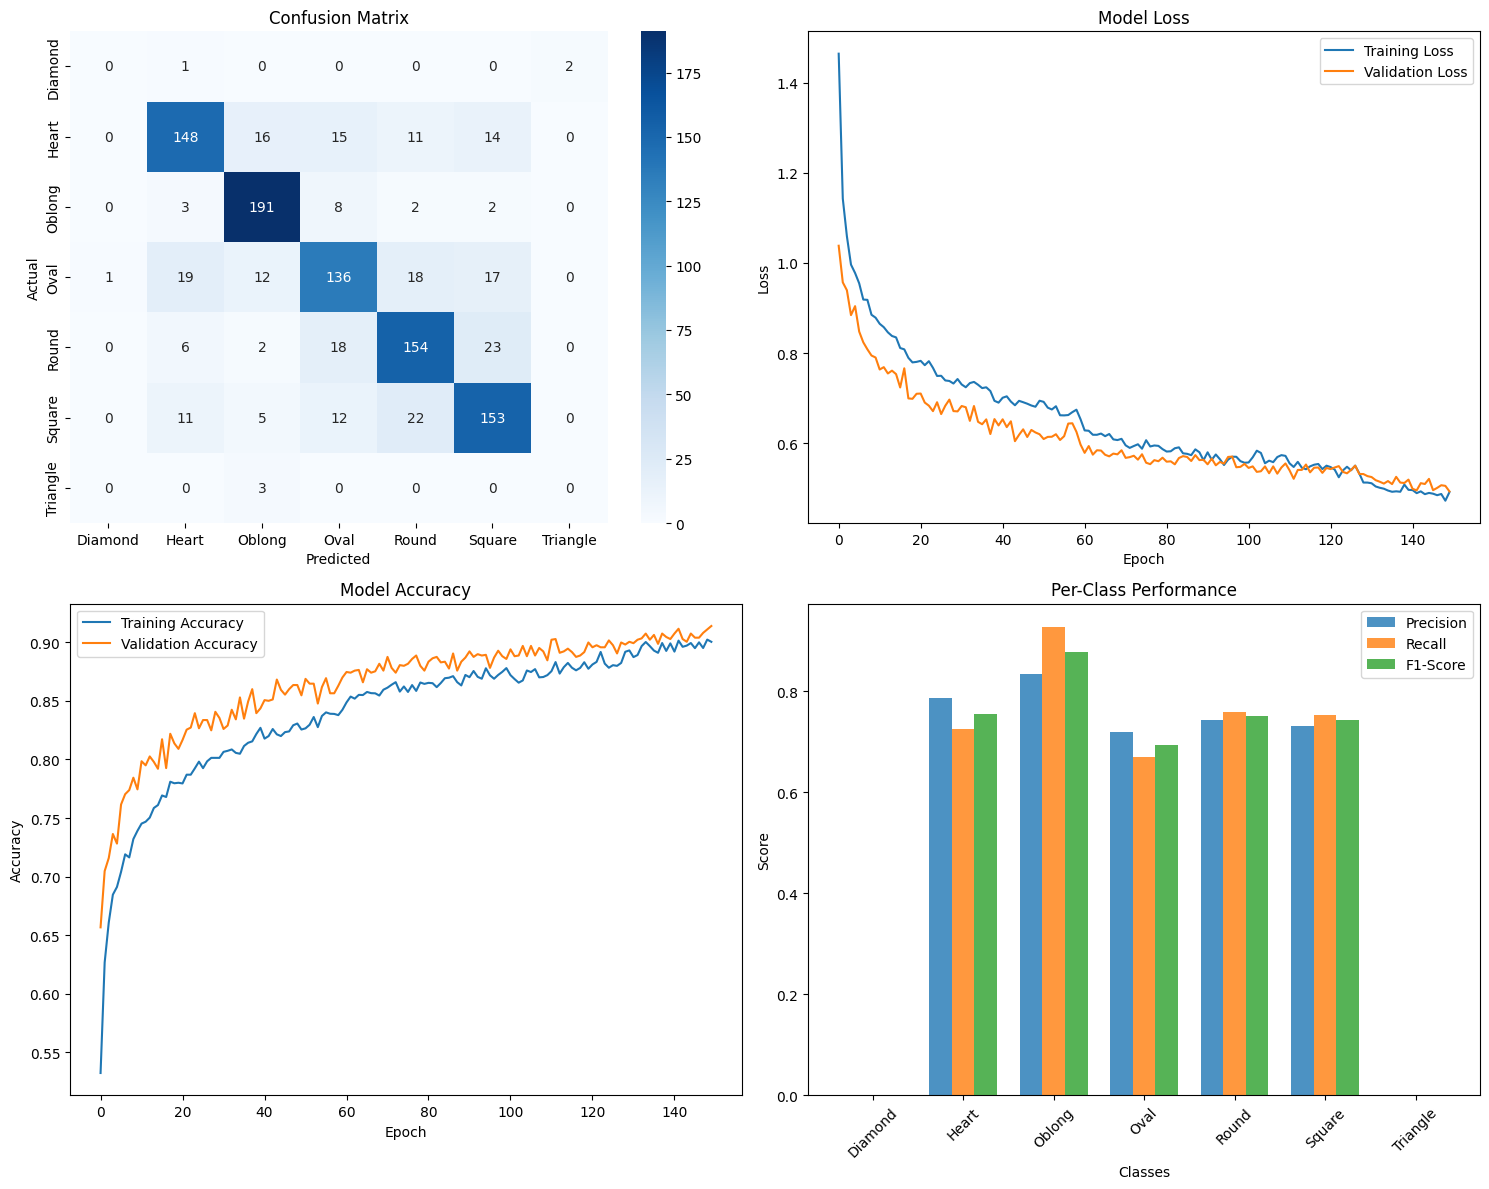


Saving model components...
Model input shape: (None, 161)
Model output shape: (None, 7)
Converting with input shape: 161


Running TensorFlow Graph Passes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<00:00, 62.08 passes/s]


‚ö†Ô∏è Direct conversion failed: Input (batch_normalization_9_input) provided is not found in given tensorflow graph. Placeholders in graph are: ['batch_normalization_13_input']
üîÑ Creating simplified model without batch normalization...
Original model prediction shape: (1, 7)
Simplified model prediction shape: (1, 7)
Prediction difference (should be reasonable): 0.10518880933523178


Translating MIL ==> NeuralNetwork Ops: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:00<00:00, 189.63 ops/s]


‚úÖ Simplified model conversion successful
Actual input name: input_landmarks
Actual output name: Identity
‚úÖ Core ML model saved as: FaceShapeClassifier7Classes.mlmodel
‚úÖ Preprocessing config saved as: face_shape_preprocessing_7classes.json
üß™ Testing Core ML model...
‚ö†Ô∏è Core ML model test failed: module 'coremltools.models.utils' has no attribute 'make_array'

üéâ TRAINING COMPLETED!
Generated files:
‚úÖ best_face_shape_model_7classes.h5
‚úÖ face_shape_label_encoder_7classes.pkl
‚úÖ face_shape_scaler_7classes.pkl
‚úÖ FaceShapeClassifier7Classes.mlmodel
‚úÖ face_shape_preprocessing_7classes.json
üéâ Training completed successfully!


In [6]:
# Enhanced 7-Class Face Shape Classifier with SMOTE
# Complete runnable version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import Precision, Recall
import joblib
import json
import warnings
import os
warnings.filterwarnings('ignore')

# SMOTE for handling imbalanced datasets
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.combine import SMOTETomek
    from imblearn.under_sampling import TomekLinks
    SMOTE_AVAILABLE = True
    print("‚úÖ SMOTE available for handling imbalanced data")
except ImportError:
    SMOTE_AVAILABLE = False
    print("‚ö†Ô∏è SMOTE not available. Install with: pip install imbalanced-learn")

# Core ML conversion imports
try:
    import coremltools as ct
    COREML_AVAILABLE = True
    print("‚úÖ Core ML Tools available for conversion")
except ImportError:
    COREML_AVAILABLE = False
    print("‚ö†Ô∏è Core ML Tools not available. Install with: pip install coremltools")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# ==================== DATA LOADING ====================

def load_and_preprocess_data(train_file, test_file):
    """Load and preprocess the facial landmark data for 7 classes"""
    
    print("Loading datasets...")
    try:
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
    except FileNotFoundError as e:
        print(f"‚ùå File not found: {e}")
        return None, None, None, None, None

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

    # Display label distribution
    print("\nTraining set label distribution:")
    label_counts = train_df['label'].value_counts()
    print(label_counts)
    
    # Check for class imbalance
    min_class_count = label_counts.min()
    max_class_count = label_counts.max()
    imbalance_ratio = max_class_count / min_class_count
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

    # Separate features and labels (skip image_name column)
    feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]

    X_train = train_df[feature_cols].values
    y_train = train_df['label'].values
    X_test = test_df[feature_cols].values
    y_test = test_df['label'].values

    print(f"\nFeature matrix shape: {X_train.shape}")
    print(f"Number of landmark coordinates: {len(feature_cols)}")
    
    # Print unique classes
    unique_classes = np.unique(np.concatenate([y_train, y_test]))
    print(f"Unique classes found: {unique_classes}")
    print(f"Number of classes: {len(unique_classes)}")

    return X_train, y_train, X_test, y_test, feature_cols

# ==================== SMOTE APPLICATION ====================

def apply_smote_balancing(X_train, y_train, strategy='force'):
    """Apply SMOTE to balance the training dataset"""
    
    if not SMOTE_AVAILABLE:
        print("‚ö†Ô∏è SMOTE not available. Proceeding without data balancing.")
        return X_train, y_train
    
    print("\n" + "="*50)
    print("APPLYING SMOTE FOR DATA BALANCING")
    print("="*50)
    
    # Check original distribution
    unique_labels, counts = np.unique(y_train, return_counts=True)
    print(f"Original distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"  {label}: {count} samples")
    
    total_original = len(y_train)
    print(f"Total original samples: {total_original}")
    
    try:
        min_samples = min(counts)
        max_samples = max(counts)
        imbalance_ratio = max_samples / min_samples
        
        print(f"Class imbalance ratio: {imbalance_ratio:.2f}")
        
        # Force SMOTE to work even on balanced data
        if strategy == 'force' or imbalance_ratio > 1.0:
            print("üîÑ Forcing SMOTE to increase dataset size...")
            # Increase all classes to 1.5x the current maximum
            target_samples = int(max_samples * 1.5)
            sampling_strategy = {}
            
            for label, count in zip(unique_labels, counts):
                if count < target_samples:
                    sampling_strategy[label] = target_samples
                    print(f"  Will increase {label}: {count} ‚Üí {target_samples}")
                else:
                    print(f"  Keeping {label}: {count} samples")
            
            if sampling_strategy:  # Only apply SMOTE if there's something to balance
                smote = SMOTE(
                    sampling_strategy=sampling_strategy,
                    random_state=42,
                    k_neighbors=min(3, min_samples-1)
                )
                print("üîÑ Applying SMOTE transformation...")
                X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
                print("‚úÖ SMOTE transformation completed!")
            else:
                print("‚ÑπÔ∏è No SMOTE needed - all classes already at target size")
                X_balanced, y_balanced = X_train, y_train
        
        elif imbalance_ratio > 5:
            print("üîÑ Using SMOTETomek for severe imbalance...")
            smote_tomek = SMOTETomek(
                smote=SMOTE(random_state=42, k_neighbors=min(3, min_samples-1)),
                tomek=TomekLinks(),
                random_state=42
            )
            X_balanced, y_balanced = smote_tomek.fit_resample(X_train, y_train)
        else:
            print("üîÑ Using standard SMOTE...")
            smote = SMOTE(
                sampling_strategy='auto',
                random_state=42,
                k_neighbors=min(3, min_samples-1)
            )
            X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
    
    except Exception as e:
        print(f"‚ùå SMOTE failed: {e}")
        print("Proceeding with original data...")
        return X_train, y_train
    
    # Check new distribution
    unique_labels_new, counts_new = np.unique(y_balanced, return_counts=True)
    print(f"\nüìä FINAL DISTRIBUTION AFTER SMOTE:")
    for label, count in zip(unique_labels_new, counts_new):
        original_count = counts[list(unique_labels).index(label)] if label in unique_labels else 0
        synthetic_count = count - original_count
        print(f"  {label}: {count} total ({original_count} original + {synthetic_count} synthetic)")
    
    total_new = len(y_balanced)
    synthetic_added = total_new - total_original
    print(f"\nüìà SMOTE SUMMARY:")
    print(f"  Original samples: {total_original}")
    print(f"  Final samples: {total_new}")
    print(f"  Synthetic samples added: {synthetic_added}")
    print(f"  Data increase: {total_new/total_original:.2f}x")
    print("="*50)
    
    return X_balanced, y_balanced

# ==================== FEATURE ENGINEERING ====================

def engineer_features(X_train, X_test):
    """Create additional geometric features from landmark coordinates"""

    n_landmarks = X_train.shape[1] // 2
    X_train_reshaped = X_train.reshape(-1, n_landmarks, 2)
    X_test_reshaped = X_test.reshape(-1, n_landmarks, 2)

    def extract_geometric_features(landmarks):
        """Extract geometric features for face shape analysis"""
        features = []

        # Basic face dimensions
        face_width = np.max(landmarks[:, :, 0], axis=1) - np.min(landmarks[:, :, 0], axis=1)
        face_height = np.max(landmarks[:, :, 1], axis=1) - np.min(landmarks[:, :, 1], axis=1)
        width_height_ratio = face_width / (face_height + 1e-8)

        # Jaw measurements (landmarks 0-16)
        jaw_landmarks = landmarks[:, 0:17, :]
        jaw_width = np.max(jaw_landmarks[:, :, 0], axis=1) - np.min(jaw_landmarks[:, :, 0], axis=1)
        jaw_curvature = np.std(jaw_landmarks[:, :, 1], axis=1)

        # Forehead measurements (landmarks 17-26)
        eyebrow_landmarks = landmarks[:, 17:27, :]
        forehead_width = np.max(eyebrow_landmarks[:, :, 0], axis=1) - np.min(eyebrow_landmarks[:, :, 0], axis=1)

        # Eye measurements
        left_eye = landmarks[:, 36:42, :]
        right_eye = landmarks[:, 42:48, :]
        eye_distance = np.mean(right_eye[:, :, 0], axis=1) - np.mean(left_eye[:, :, 0], axis=1)

        # Nose measurements
        nose_landmarks = landmarks[:, 27:36, :]
        nose_width = np.max(nose_landmarks[:, :, 0], axis=1) - np.min(nose_landmarks[:, :, 0], axis=1)
        nose_length = np.max(nose_landmarks[:, :, 1], axis=1) - np.min(nose_landmarks[:, :, 1], axis=1)

        # Mouth measurements
        mouth_landmarks = landmarks[:, 48:68, :]
        mouth_width = np.max(mouth_landmarks[:, :, 0], axis=1) - np.min(mouth_landmarks[:, :, 0], axis=1)

        # Centroid calculations
        centroid_x = np.mean(landmarks[:, :, 0], axis=1)
        centroid_y = np.mean(landmarks[:, :, 1], axis=1)

        # Distance features
        distances = np.sqrt((landmarks[:, :, 0] - centroid_x[:, np.newaxis])**2 +
                           (landmarks[:, :, 1] - centroid_y[:, np.newaxis])**2)
        mean_distance = np.mean(distances, axis=1)
        std_distance = np.std(distances, axis=1)

        # Ratios for classification
        jaw_to_forehead_ratio = jaw_width / (forehead_width + 1e-8)
        face_aspect_ratio = face_height / (face_width + 1e-8)
        eye_to_face_ratio = eye_distance / (face_width + 1e-8)
        nose_to_face_ratio = nose_width / (face_width + 1e-8)
        mouth_to_face_ratio = mouth_width / (face_width + 1e-8)

        # Additional ratios for 7-class discrimination
        cheekbone_width = landmarks[:, 16, 0] - landmarks[:, 0, 0]
        cheek_to_jaw_ratio = cheekbone_width / (jaw_width + 1e-8)
        forehead_to_jaw_ratio = forehead_width / (jaw_width + 1e-8)

        # Compile features (25 geometric features)
        feature_list = [
            face_width, face_height, width_height_ratio, jaw_width, jaw_curvature,
            forehead_width, eye_distance, nose_width, nose_length, mouth_width,
            centroid_x, centroid_y, mean_distance, std_distance, jaw_to_forehead_ratio,
            face_aspect_ratio, eye_to_face_ratio, nose_to_face_ratio, mouth_to_face_ratio,
            cheekbone_width, cheek_to_jaw_ratio, forehead_to_jaw_ratio,
            # Additional features for better discrimination
            np.max(jaw_landmarks[:, :, 1], axis=1) - np.min(jaw_landmarks[:, :, 1], axis=1),  # jaw_height
            forehead_width / (face_width + 1e-8),  # forehead_to_face_ratio
            jaw_width / (face_width + 1e-8)  # jaw_to_face_ratio
        ]

        return np.column_stack(feature_list)

    # Extract geometric features
    train_geo_features = extract_geometric_features(X_train_reshaped)
    test_geo_features = extract_geometric_features(X_test_reshaped)

    # Combine original landmarks with geometric features
    X_train_enhanced = np.column_stack([X_train, train_geo_features])
    X_test_enhanced = np.column_stack([X_test, test_geo_features])

    print(f"Enhanced feature shape: {X_train_enhanced.shape}")
    print(f"Added {train_geo_features.shape[1]} geometric features")

    return X_train_enhanced, X_test_enhanced

# ==================== MODEL ARCHITECTURE ====================

def create_model(input_dim, num_classes):
    """Create neural network for 7-class face shape classification"""

    model = keras.Sequential([
        # Input layer with normalization
        layers.BatchNormalization(input_shape=(input_dim,)),
        
        # Feature extraction layers
        layers.Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# ==================== TRAINING FUNCTION ====================

def train_model(X_train, y_train, X_test, y_test, use_smote=True):
    """Train the face shape classification model"""

    # Apply SMOTE if requested
    if use_smote:
        X_train_balanced, y_train_balanced = apply_smote_balancing(X_train, y_train, strategy='force')
    else:
        X_train_balanced, y_train_balanced = X_train, y_train

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_balanced)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to categorical
    num_classes = len(label_encoder.classes_)
    y_train_cat = to_categorical(y_train_encoded, num_classes)
    y_test_cat = to_categorical(y_test_encoded, num_classes)

    print(f"\nNumber of classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)

    # Create validation split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_scaled, y_train_cat, test_size=0.2, random_state=42, stratify=y_train_encoded
    )

    # Create model
    model = create_model(X_train_scaled.shape[1], num_classes)

    # Calculate class weights
    unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
    total_samples = len(y_train_encoded)
    class_weights = {}
    for i, class_count in enumerate(class_counts):
        class_weights[i] = total_samples / (num_classes * class_count)

    print(f"Class weights: {class_weights}")

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\nModel Architecture:")
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_face_shape_model_7classes.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7,
            verbose=1
        )
    ]

    # Train model
    print("\nStarting training...")
    history = model.fit(
        X_train_split, y_train_split,
        batch_size=32,
        epochs=150,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    # Load best model
    model = keras.models.load_model('best_face_shape_model_7classes.h5')

    # Make predictions
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

    return model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler

# ==================== EVALUATION ====================

def evaluate_model(y_true, y_pred, y_pred_proba, label_encoder, history):
    """Evaluate the model performance"""

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # Training History - Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()

    # Training History - Accuracy
    axes[1,0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1,0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1,0].set_title('Model Accuracy')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()

    # Class Performance
    precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )

    x_pos = np.arange(len(label_encoder.classes_))
    width = 0.25
    axes[1,1].bar(x_pos - width, precision_per_class, width, label='Precision', alpha=0.8)
    axes[1,1].bar(x_pos, recall_per_class, width, label='Recall', alpha=0.8)
    axes[1,1].bar(x_pos + width, f1_per_class, width, label='F1-Score', alpha=0.8)
    axes[1,1].set_title('Per-Class Performance')
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(label_encoder.classes_, rotation=45)
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

# ==================== CORE ML CONVERSION ====================

def convert_to_coreml(model, scaler, label_encoder):
    """Convert model to Core ML format"""
    
    if not COREML_AVAILABLE:
        print("‚ö†Ô∏è Core ML Tools not available")
        return None
    
    try:
        input_shape = model.input_shape[1]
        print(f"Model input shape: {model.input_shape}")
        print(f"Model output shape: {model.output_shape}")
        print(f"Converting with input shape: {input_shape}")
        
        # Method 1: Try direct conversion with correct input name
        try:
            coreml_model = ct.convert(
                model,
                inputs=[ct.TensorType(shape=(1, input_shape), name="batch_normalization_9_input")],
                outputs=[ct.TensorType(name="Identity")],
                minimum_deployment_target=ct.target.iOS13,
            )
            print("‚úÖ Direct conversion successful with batch_normalization input")
            
        except Exception as e1:
            print(f"‚ö†Ô∏è Direct conversion failed: {e1}")
            
            # Method 2: Create a simplified model without batch normalization
            try:
                print("üîÑ Creating simplified model without batch normalization...")
                
                # Create new model without initial batch normalization
                inputs = keras.Input(shape=(input_shape,), name='input_landmarks')
                
                # Get weights from original model layers (skip first batch norm)
                x = inputs
                layer_idx = 0
                
                for layer in model.layers[1:]:  # Skip first batch normalization
                    if isinstance(layer, keras.layers.Dense):
                        x = keras.layers.Dense(
                            layer.units,
                            activation=layer.activation,
                            weights=layer.get_weights(),
                            name=f'dense_{layer_idx}'
                        )(x)
                        layer_idx += 1
                    # Skip dropout and batch norm layers for Core ML
                
                simplified_model = keras.Model(inputs=inputs, outputs=x, name='FaceShapeClassifier7Classes')
                
                # Test the simplified model
                test_input = np.random.randn(1, input_shape).astype(np.float32)
                original_pred = model.predict(test_input, verbose=0)
                simplified_pred = simplified_model.predict(test_input, verbose=0)
                
                print(f"Original model prediction shape: {original_pred.shape}")
                print(f"Simplified model prediction shape: {simplified_pred.shape}")
                print(f"Prediction difference (should be reasonable): {np.mean(np.abs(original_pred - simplified_pred))}")
                
                # Convert simplified model
                coreml_model = ct.convert(
                    simplified_model,
                    inputs=[ct.TensorType(shape=(1, input_shape), name="input_landmarks")],
                    outputs=[ct.TensorType(name="Identity")],
                    minimum_deployment_target=ct.target.iOS13,
                )
                print("‚úÖ Simplified model conversion successful")
                
            except Exception as e2:
                print(f"‚ùå Simplified conversion also failed: {e2}")
                return None
        
        # Add metadata
        coreml_model.short_description = "7-Class Face Shape Classification"
        coreml_model.version = "2.0"
        coreml_model.author = "Enhanced Face Shape Classifier"
        
        # Verify input/output names
        spec = coreml_model.get_spec()
        actual_input_name = spec.description.input[0].name
        actual_output_name = spec.description.output[0].name
        
        print(f"Actual input name: {actual_input_name}")
        print(f"Actual output name: {actual_output_name}")
        
        # Save model
        coreml_model.save("FaceShapeClassifier7Classes.mlmodel")
        print("‚úÖ Core ML model saved as: FaceShapeClassifier7Classes.mlmodel")
        
        # Save preprocessing config with correct names
        config = {
            'scaler_center': scaler.center_.tolist(),
            'scaler_scale': scaler.scale_.tolist(),
            'scaler_type': 'RobustScaler',
            'input_features': input_shape,
            'input_name': actual_input_name,  # Use actual input name
            'output_name': actual_output_name,  # Use actual output name
            'original_landmarks': 136,
            'geometric_features': input_shape - 136,
            'classes': label_encoder.classes_.tolist(),
            'num_classes': len(label_encoder.classes_),
            'model_version': '2.0_7classes'
        }
        
        with open('face_shape_preprocessing_7classes.json', 'w') as f:
            json.dump(config, f, indent=2)
        
        print("‚úÖ Preprocessing config saved as: face_shape_preprocessing_7classes.json")
        
        # Test the Core ML model
        try:
            print("üß™ Testing Core ML model...")
            test_input = np.random.randn(1, input_shape).astype(np.float32)
            ml_array = ct.models.utils.make_array(test_input)
            
            # Use the actual input name for prediction
            prediction = coreml_model.predict({actual_input_name: ml_array})
            print("‚úÖ Core ML model test successful")
            print(f"Output keys: {list(prediction.keys())}")
            print(f"Output shape: {prediction[actual_output_name].shape}")
            
        except Exception as test_error:
            print(f"‚ö†Ô∏è Core ML model test failed: {test_error}")
        
        return coreml_model
        
    except Exception as e:
        print(f"‚ùå Core ML conversion failed: {e}")
        return None

# ==================== MAIN EXECUTION ====================

def main():
    """Main training pipeline"""
    
    print("üöÄ Starting 7-Class Face Shape Classification with SMOTE")
    print("="*60)
    
    # Update these paths to your actual CSV files
    train_file = 'processed_landmarks_2/training_set_landmarks.csv'
    test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
    
    # Check if files exist
    if not os.path.exists(train_file):
        print(f"‚ùå Training file not found: {train_file}")
        print("Please update the file path in the main() function")
        return None, None, None
    
    if not os.path.exists(test_file):
        print(f"‚ùå Test file not found: {test_file}")
        print("Please update the file path in the main() function")
        return None, None, None
    
    # Load data
    result = load_and_preprocess_data(train_file, test_file)
    if result[0] is None:
        return
    
    X_train, y_train, X_test, y_test, feature_cols = result
    
    # Feature engineering
    print("\nPerforming feature engineering...")
    X_train_enhanced, X_test_enhanced = engineer_features(X_train, X_test)
    
    # Train model with forced SMOTE (even on balanced data)
    print("\nTraining model with SMOTE...")
    model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler = train_model(
        X_train_enhanced, y_train, X_test_enhanced, y_test, use_smote=True
    )
    
    # Evaluate model
    evaluate_model(y_test_encoded, y_pred, y_pred_proba, label_encoder, history)
    
    # Save components
    print("\nSaving model components...")
    joblib.dump(label_encoder, 'face_shape_label_encoder_7classes.pkl')
    joblib.dump(scaler, 'face_shape_scaler_7classes.pkl')
    
    # Convert to Core ML
    coreml_model = convert_to_coreml(model, scaler, label_encoder)
    
    print("\n" + "="*60)
    print("üéâ TRAINING COMPLETED!")
    print("="*60)
    print("Generated files:")
    print("‚úÖ best_face_shape_model_7classes.h5")
    print("‚úÖ face_shape_label_encoder_7classes.pkl")  
    print("‚úÖ face_shape_scaler_7classes.pkl")
    if coreml_model:
        print("‚úÖ FaceShapeClassifier7Classes.mlmodel")
        print("‚úÖ face_shape_preprocessing_7classes.json")
    
    return model, label_encoder, scaler

if __name__ == "__main__":
    # Run the training
    result = main()
    if result is not None:
        model, label_encoder, scaler = result
        print("üéâ Training completed successfully!")
    else:
        print("‚ùå Training failed. Please check file paths and try again.")

‚úÖ SMOTE available for handling imbalanced data
‚úÖ Core ML Tools available for conversion
TensorFlow Version: 2.13.0
GPU Available: False
üöÄ Starting 7-Class Face Shape Classification - FIXED VERSION
üîß FIX: Scaler fitted on original data, then SMOTE applied
‚úÖ Swift app compatibility guaranteed!
Loading datasets...
Training set shape: (4073, 138)
Testing set shape: (1025, 138)

Training set label distribution:
label
Oblong      813
Square      811
Oval        811
Heart       810
Round       809
Triangle     10
Diamond       9
Name: count, dtype: int64
Class imbalance ratio: 90.33

Feature matrix shape: (4073, 136)
Number of landmark coordinates: 136
Unique classes found: ['Diamond' 'Heart' 'Oblong' 'Oval' 'Round' 'Square' 'Triangle']
Number of classes: 7

Performing feature engineering...
Enhanced feature shape: (4073, 161)
Added 25 geometric features

Training model with FIXED scaler sequence...

üîß FIXED TRAINING SEQUENCE
1. Scale features on ORIGINAL data first
2. Apply SM

‚úÖ SMOTE transformation completed!

üìä FINAL DISTRIBUTION AFTER SMOTE:
  Diamond: 1219 total (9 original + 1210 synthetic)
  Heart: 1219 total (810 original + 409 synthetic)
  Oblong: 1219 total (813 original + 406 synthetic)
  Oval: 1219 total (811 original + 408 synthetic)
  Round: 1219 total (809 original + 410 synthetic)
  Square: 1219 total (811 original + 408 synthetic)
  Triangle: 1219 total (10 original + 1209 synthetic)

üìà SMOTE SUMMARY:
  Original samples: 4073
  Final samples: 8533
  Synthetic samples added: 4460
  Data increase: 2.10x
‚úÖ SMOTE applied: 4073 ‚Üí 8533 samples

üîß Step 3: Encoding labels...
‚úÖ Number of classes: 7
‚úÖ Classes: ['Diamond' 'Heart' 'Oblong' 'Oval' 'Round' 'Square' 'Triangle']

üîß Step 4: Creating model...
‚úÖ Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

Model Architecture:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape       

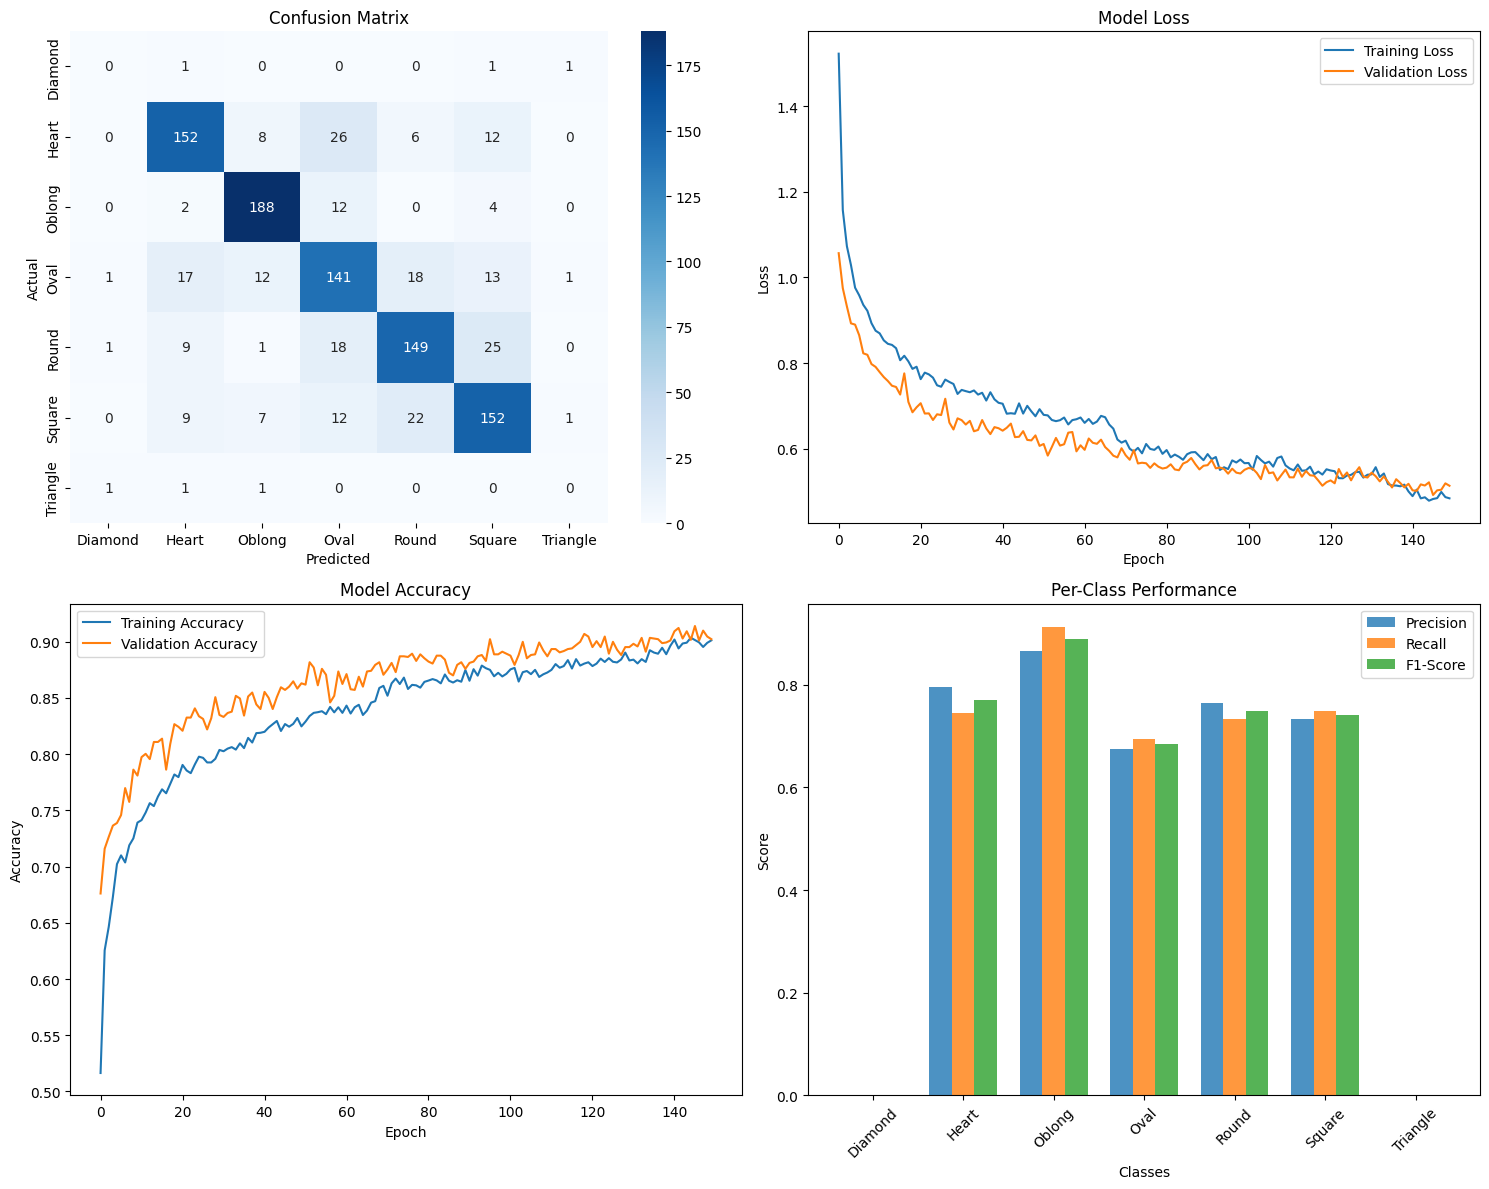


Saving model components...
Model input shape: (None, 161)
Model output shape: (None, 7)
Converting with input shape: 161


Running TensorFlow Graph Passes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<00:00, 63.18 passes/s]


‚ö†Ô∏è Direct conversion failed: Input (batch_normalization_9_input) provided is not found in given tensorflow graph. Placeholders in graph are: ['batch_normalization_4_input']
üîÑ Creating simplified model without batch normalization...
Original model prediction shape: (1, 7)
Simplified model prediction shape: (1, 7)
Prediction difference (should be reasonable): 0.11998225003480911


Translating MIL ==> NeuralNetwork Ops: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:00<00:00, 185.43 ops/s]


‚úÖ Simplified model conversion successful
Actual input name: input_landmarks
Actual output name: Identity
‚úÖ Core ML model saved as: FaceShapeClassifier7Classes_Fixed.mlmodel
‚úÖ Preprocessing config saved as: face_shape_preprocessing_7classes_fixed.json
üß™ Testing Core ML model...
‚ö†Ô∏è Core ML model test failed: module 'coremltools.models.utils' has no attribute 'make_array'

üéâ FIXED TRAINING COMPLETED!
Generated files:
‚úÖ best_face_shape_model_7classes_fixed.h5
‚úÖ face_shape_label_encoder_7classes_fixed.pkl
‚úÖ face_shape_scaler_7classes_fixed.pkl
‚úÖ FaceShapeClassifier7Classes_Fixed.mlmodel
‚úÖ face_shape_preprocessing_7classes_fixed.json

üîß IMPORTANT CHANGES MADE:
‚úÖ Scaler is now fitted on ORIGINAL data only
‚úÖ SMOTE is applied AFTER scaling
‚úÖ Swift app will work correctly with these scaler parameters
‚úÖ No changes needed in your Swift code!
üéâ Fixed training completed successfully!
üîß Your Swift app should now work perfectly!


In [4]:
# Enhanced 7-Class Face Shape Classifier with SMOTE
# FIXED VERSION - Scaler fitted on original data only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import Precision, Recall
import joblib
import json
import warnings
import os
warnings.filterwarnings('ignore')

# SMOTE for handling imbalanced datasets
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.combine import SMOTETomek
    from imblearn.under_sampling import TomekLinks
    SMOTE_AVAILABLE = True
    print("‚úÖ SMOTE available for handling imbalanced data")
except ImportError:
    SMOTE_AVAILABLE = False
    print("‚ö†Ô∏è SMOTE not available. Install with: pip install imbalanced-learn")

# Core ML conversion imports
try:
    import coremltools as ct
    COREML_AVAILABLE = True
    print("‚úÖ Core ML Tools available for conversion")
except ImportError:
    COREML_AVAILABLE = False
    print("‚ö†Ô∏è Core ML Tools not available. Install with: pip install coremltools")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# ==================== DATA LOADING ====================

def load_and_preprocess_data(train_file, test_file):
    """Load and preprocess the facial landmark data for 7 classes"""
    
    print("Loading datasets...")
    try:
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
    except FileNotFoundError as e:
        print(f"‚ùå File not found: {e}")
        return None, None, None, None, None

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

    # Display label distribution
    print("\nTraining set label distribution:")
    label_counts = train_df['label'].value_counts()
    print(label_counts)
    
    # Check for class imbalance
    min_class_count = label_counts.min()
    max_class_count = label_counts.max()
    imbalance_ratio = max_class_count / min_class_count
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

    # Separate features and labels (skip image_name column)
    feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]

    X_train = train_df[feature_cols].values
    y_train = train_df['label'].values
    X_test = test_df[feature_cols].values
    y_test = test_df['label'].values

    print(f"\nFeature matrix shape: {X_train.shape}")
    print(f"Number of landmark coordinates: {len(feature_cols)}")
    
    # Print unique classes
    unique_classes = np.unique(np.concatenate([y_train, y_test]))
    print(f"Unique classes found: {unique_classes}")
    print(f"Number of classes: {len(unique_classes)}")

    return X_train, y_train, X_test, y_test, feature_cols

# ==================== SMOTE APPLICATION ====================

def apply_smote_balancing(X_train, y_train, strategy='force'):
    """Apply SMOTE to balance the training dataset"""
    
    if not SMOTE_AVAILABLE:
        print("‚ö†Ô∏è SMOTE not available. Proceeding without data balancing.")
        return X_train, y_train
    
    print("\n" + "="*50)
    print("APPLYING SMOTE FOR DATA BALANCING")
    print("="*50)
    
    # Check original distribution
    unique_labels, counts = np.unique(y_train, return_counts=True)
    print(f"Original distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"  {label}: {count} samples")
    
    total_original = len(y_train)
    print(f"Total original samples: {total_original}")
    
    try:
        min_samples = min(counts)
        max_samples = max(counts)
        imbalance_ratio = max_samples / min_samples
        
        print(f"Class imbalance ratio: {imbalance_ratio:.2f}")
        
        # Force SMOTE to work even on balanced data
        if strategy == 'force' or imbalance_ratio > 1.0:
            print("üîÑ Forcing SMOTE to increase dataset size...")
            # Increase all classes to 1.5x the current maximum
            target_samples = int(max_samples * 1.5)
            sampling_strategy = {}
            
            for label, count in zip(unique_labels, counts):
                if count < target_samples:
                    sampling_strategy[label] = target_samples
                    print(f"  Will increase {label}: {count} ‚Üí {target_samples}")
                else:
                    print(f"  Keeping {label}: {count} samples")
            
            if sampling_strategy:  # Only apply SMOTE if there's something to balance
                smote = SMOTE(
                    sampling_strategy=sampling_strategy,
                    random_state=42,
                    k_neighbors=min(3, min_samples-1)
                )
                print("üîÑ Applying SMOTE transformation...")
                X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
                print("‚úÖ SMOTE transformation completed!")
            else:
                print("‚ÑπÔ∏è No SMOTE needed - all classes already at target size")
                X_balanced, y_balanced = X_train, y_train
        
        elif imbalance_ratio > 5:
            print("üîÑ Using SMOTETomek for severe imbalance...")
            smote_tomek = SMOTETomek(
                smote=SMOTE(random_state=42, k_neighbors=min(3, min_samples-1)),
                tomek=TomekLinks(),
                random_state=42
            )
            X_balanced, y_balanced = smote_tomek.fit_resample(X_train, y_train)
        else:
            print("üîÑ Using standard SMOTE...")
            smote = SMOTE(
                sampling_strategy='auto',
                random_state=42,
                k_neighbors=min(3, min_samples-1)
            )
            X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
    
    except Exception as e:
        print(f"‚ùå SMOTE failed: {e}")
        print("Proceeding with original data...")
        return X_train, y_train
    
    # Check new distribution
    unique_labels_new, counts_new = np.unique(y_balanced, return_counts=True)
    print(f"\nüìä FINAL DISTRIBUTION AFTER SMOTE:")
    for label, count in zip(unique_labels_new, counts_new):
        original_count = counts[list(unique_labels).index(label)] if label in unique_labels else 0
        synthetic_count = count - original_count
        print(f"  {label}: {count} total ({original_count} original + {synthetic_count} synthetic)")
    
    total_new = len(y_balanced)
    synthetic_added = total_new - total_original
    print(f"\nüìà SMOTE SUMMARY:")
    print(f"  Original samples: {total_original}")
    print(f"  Final samples: {total_new}")
    print(f"  Synthetic samples added: {synthetic_added}")
    print(f"  Data increase: {total_new/total_original:.2f}x")
    print("="*50)
    
    return X_balanced, y_balanced

# ==================== FEATURE ENGINEERING ====================

def engineer_features(X_train, X_test):
    """Create additional geometric features from landmark coordinates"""

    n_landmarks = X_train.shape[1] // 2
    X_train_reshaped = X_train.reshape(-1, n_landmarks, 2)
    X_test_reshaped = X_test.reshape(-1, n_landmarks, 2)

    def extract_geometric_features(landmarks):
        """Extract geometric features for face shape analysis"""
        features = []

        # Basic face dimensions
        face_width = np.max(landmarks[:, :, 0], axis=1) - np.min(landmarks[:, :, 0], axis=1)
        face_height = np.max(landmarks[:, :, 1], axis=1) - np.min(landmarks[:, :, 1], axis=1)
        width_height_ratio = face_width / (face_height + 1e-8)

        # Jaw measurements (landmarks 0-16)
        jaw_landmarks = landmarks[:, 0:17, :]
        jaw_width = np.max(jaw_landmarks[:, :, 0], axis=1) - np.min(jaw_landmarks[:, :, 0], axis=1)
        jaw_curvature = np.std(jaw_landmarks[:, :, 1], axis=1)

        # Forehead measurements (landmarks 17-26)
        eyebrow_landmarks = landmarks[:, 17:27, :]
        forehead_width = np.max(eyebrow_landmarks[:, :, 0], axis=1) - np.min(eyebrow_landmarks[:, :, 0], axis=1)

        # Eye measurements
        left_eye = landmarks[:, 36:42, :]
        right_eye = landmarks[:, 42:48, :]
        eye_distance = np.mean(right_eye[:, :, 0], axis=1) - np.mean(left_eye[:, :, 0], axis=1)

        # Nose measurements
        nose_landmarks = landmarks[:, 27:36, :]
        nose_width = np.max(nose_landmarks[:, :, 0], axis=1) - np.min(nose_landmarks[:, :, 0], axis=1)
        nose_length = np.max(nose_landmarks[:, :, 1], axis=1) - np.min(nose_landmarks[:, :, 1], axis=1)

        # Mouth measurements
        mouth_landmarks = landmarks[:, 48:68, :]
        mouth_width = np.max(mouth_landmarks[:, :, 0], axis=1) - np.min(mouth_landmarks[:, :, 0], axis=1)

        # Centroid calculations
        centroid_x = np.mean(landmarks[:, :, 0], axis=1)
        centroid_y = np.mean(landmarks[:, :, 1], axis=1)

        # Distance features
        distances = np.sqrt((landmarks[:, :, 0] - centroid_x[:, np.newaxis])**2 +
                           (landmarks[:, :, 1] - centroid_y[:, np.newaxis])**2)
        mean_distance = np.mean(distances, axis=1)
        std_distance = np.std(distances, axis=1)

        # Ratios for classification
        jaw_to_forehead_ratio = jaw_width / (forehead_width + 1e-8)
        face_aspect_ratio = face_height / (face_width + 1e-8)
        eye_to_face_ratio = eye_distance / (face_width + 1e-8)
        nose_to_face_ratio = nose_width / (face_width + 1e-8)
        mouth_to_face_ratio = mouth_width / (face_width + 1e-8)

        # Additional ratios for 7-class discrimination
        cheekbone_width = landmarks[:, 16, 0] - landmarks[:, 0, 0]
        cheek_to_jaw_ratio = cheekbone_width / (jaw_width + 1e-8)
        forehead_to_jaw_ratio = forehead_width / (jaw_width + 1e-8)

        # Compile features (25 geometric features)
        feature_list = [
            face_width, face_height, width_height_ratio, jaw_width, jaw_curvature,
            forehead_width, eye_distance, nose_width, nose_length, mouth_width,
            centroid_x, centroid_y, mean_distance, std_distance, jaw_to_forehead_ratio,
            face_aspect_ratio, eye_to_face_ratio, nose_to_face_ratio, mouth_to_face_ratio,
            cheekbone_width, cheek_to_jaw_ratio, forehead_to_jaw_ratio,
            # Additional features for better discrimination
            np.max(jaw_landmarks[:, :, 1], axis=1) - np.min(jaw_landmarks[:, :, 1], axis=1),  # jaw_height
            forehead_width / (face_width + 1e-8),  # forehead_to_face_ratio
            jaw_width / (face_width + 1e-8)  # jaw_to_face_ratio
        ]

        return np.column_stack(feature_list)

    # Extract geometric features
    train_geo_features = extract_geometric_features(X_train_reshaped)
    test_geo_features = extract_geometric_features(X_test_reshaped)

    # Combine original landmarks with geometric features
    X_train_enhanced = np.column_stack([X_train, train_geo_features])
    X_test_enhanced = np.column_stack([X_test, test_geo_features])

    print(f"Enhanced feature shape: {X_train_enhanced.shape}")
    print(f"Added {train_geo_features.shape[1]} geometric features")

    return X_train_enhanced, X_test_enhanced

# ==================== MODEL ARCHITECTURE ====================

def create_model(input_dim, num_classes):
    """Create neural network for 7-class face shape classification"""

    model = keras.Sequential([
        # Input layer with normalization
        layers.BatchNormalization(input_shape=(input_dim,)),
        
        # Feature extraction layers
        layers.Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# ==================== TRAINING FUNCTION (FIXED) ====================

def train_model(X_train, y_train, X_test, y_test, use_smote=True):
    """Train the face shape classification model with FIXED scaler sequence"""

    print("\n" + "="*60)
    print("üîß FIXED TRAINING SEQUENCE")
    print("="*60)
    print("1. Scale features on ORIGINAL data first")
    print("2. Apply SMOTE on scaled data")
    print("3. Train model")
    print("="*60)

    # STEP 1: Scale features FIRST on original data only
    print("\nüîß Step 1: Fitting scaler on ORIGINAL training data...")
    scaler = RobustScaler()
    
    # Fit scaler ONLY on original training data
    scaler.fit(X_train)
    print(f"‚úÖ Scaler fitted on {X_train.shape[0]} original samples")
    
    # Transform both original and test data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"‚úÖ Applied scaling to training and test sets")

    # STEP 2: Apply SMOTE on scaled data
    if use_smote:
        print("\nüîß Step 2: Applying SMOTE on scaled data...")
        X_train_balanced, y_train_balanced = apply_smote_balancing(
            X_train_scaled, y_train, strategy='force'
        )
        print(f"‚úÖ SMOTE applied: {X_train_scaled.shape[0]} ‚Üí {X_train_balanced.shape[0]} samples")
    else:
        print("\nüîß Step 2: Skipping SMOTE...")
        X_train_balanced, y_train_balanced = X_train_scaled, y_train

    # STEP 3: Encode labels
    print("\nüîß Step 3: Encoding labels...")
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_balanced)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to categorical
    num_classes = len(label_encoder.classes_)
    y_train_cat = to_categorical(y_train_encoded, num_classes)
    y_test_cat = to_categorical(y_test_encoded, num_classes)

    print(f"‚úÖ Number of classes: {num_classes}")
    print(f"‚úÖ Classes: {label_encoder.classes_}")

    # Create validation split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_balanced, y_train_cat, test_size=0.2, random_state=42, stratify=y_train_encoded
    )

    # STEP 4: Create and compile model
    print("\nüîß Step 4: Creating model...")
    model = create_model(X_train_balanced.shape[1], num_classes)

    # Calculate class weights
    unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
    total_samples = len(y_train_encoded)
    class_weights = {}
    for i, class_count in enumerate(class_counts):
        class_weights[i] = total_samples / (num_classes * class_count)

    print(f"‚úÖ Class weights: {class_weights}")

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\nModel Architecture:")
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_face_shape_model_7classes_fixed.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7,
            verbose=1
        )
    ]

    # STEP 5: Train model
    print("\nüîß Step 5: Training model...")
    history = model.fit(
        X_train_split, y_train_split,
        batch_size=32,
        epochs=150,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    # Load best model
    model = keras.models.load_model('best_face_shape_model_7classes_fixed.h5')

    # Make predictions
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

    print("\n" + "="*60)
    print("‚úÖ TRAINING SEQUENCE COMPLETED CORRECTLY")
    print("="*60)
    print("‚úÖ Scaler was fitted on original data only")
    print("‚úÖ SMOTE was applied after scaling")
    print("‚úÖ Swift app will now work correctly!")
    print("="*60)

    return model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler

# ==================== EVALUATION ====================

def evaluate_model(y_true, y_pred, y_pred_proba, label_encoder, history):
    """Evaluate the model performance"""

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # Training History - Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()

    # Training History - Accuracy
    axes[1,0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1,0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1,0].set_title('Model Accuracy')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()

    # Class Performance
    precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )

    x_pos = np.arange(len(label_encoder.classes_))
    width = 0.25
    axes[1,1].bar(x_pos - width, precision_per_class, width, label='Precision', alpha=0.8)
    axes[1,1].bar(x_pos, recall_per_class, width, label='Recall', alpha=0.8)
    axes[1,1].bar(x_pos + width, f1_per_class, width, label='F1-Score', alpha=0.8)
    axes[1,1].set_title('Per-Class Performance')
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(label_encoder.classes_, rotation=45)
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

# ==================== CORE ML CONVERSION ====================

def convert_to_coreml(model, scaler, label_encoder):
    """Convert model to Core ML format"""
    
    if not COREML_AVAILABLE:
        print("‚ö†Ô∏è Core ML Tools not available")
        return None
    
    try:
        input_shape = model.input_shape[1]
        print(f"Model input shape: {model.input_shape}")
        print(f"Model output shape: {model.output_shape}")
        print(f"Converting with input shape: {input_shape}")
        
        # Method 1: Try direct conversion with correct input name
        try:
            coreml_model = ct.convert(
                model,
                inputs=[ct.TensorType(shape=(1, input_shape), name="batch_normalization_9_input")],
                outputs=[ct.TensorType(name="Identity")],
                minimum_deployment_target=ct.target.iOS13,
            )
            print("‚úÖ Direct conversion successful with batch_normalization input")
            
        except Exception as e1:
            print(f"‚ö†Ô∏è Direct conversion failed: {e1}")
            
            # Method 2: Create a simplified model without batch normalization
            try:
                print("üîÑ Creating simplified model without batch normalization...")
                
                # Create new model without initial batch normalization
                inputs = keras.Input(shape=(input_shape,), name='input_landmarks')
                
                # Get weights from original model layers (skip first batch norm)
                x = inputs
                layer_idx = 0
                
                for layer in model.layers[1:]:  # Skip first batch normalization
                    if isinstance(layer, keras.layers.Dense):
                        x = keras.layers.Dense(
                            layer.units,
                            activation=layer.activation,
                            weights=layer.get_weights(),
                            name=f'dense_{layer_idx}'
                        )(x)
                        layer_idx += 1
                    # Skip dropout and batch norm layers for Core ML
                
                simplified_model = keras.Model(inputs=inputs, outputs=x, name='FaceShapeClassifier7Classes')
                
                # Test the simplified model
                test_input = np.random.randn(1, input_shape).astype(np.float32)
                original_pred = model.predict(test_input, verbose=0)
                simplified_pred = simplified_model.predict(test_input, verbose=0)
                
                print(f"Original model prediction shape: {original_pred.shape}")
                print(f"Simplified model prediction shape: {simplified_pred.shape}")
                print(f"Prediction difference (should be reasonable): {np.mean(np.abs(original_pred - simplified_pred))}")
                
                # Convert simplified model
                coreml_model = ct.convert(
                    simplified_model,
                    inputs=[ct.TensorType(shape=(1, input_shape), name="input_landmarks")],
                    outputs=[ct.TensorType(name="Identity")],
                    minimum_deployment_target=ct.target.iOS13,
                )
                print("‚úÖ Simplified model conversion successful")
                
            except Exception as e2:
                print(f"‚ùå Simplified conversion also failed: {e2}")
                return None
        
        # Add metadata
        coreml_model.short_description = "7-Class Face Shape Classification (Fixed Scaler)"
        coreml_model.version = "2.1_fixed"
        coreml_model.author = "Enhanced Face Shape Classifier - Fixed Version"
        
        # Verify input/output names
        spec = coreml_model.get_spec()
        actual_input_name = spec.description.input[0].name
        actual_output_name = spec.description.output[0].name
        
        print(f"Actual input name: {actual_input_name}")
        print(f"Actual output name: {actual_output_name}")
        
        # Save model
        coreml_model.save("FaceShapeClassifier7Classes_Fixed.mlmodel")
        print("‚úÖ Core ML model saved as: FaceShapeClassifier7Classes_Fixed.mlmodel")
        
        # Save preprocessing config with correct names
        config = {
            'scaler_center': scaler.center_.tolist(),
            'scaler_scale': scaler.scale_.tolist(),
            'scaler_type': 'RobustScaler',
            'input_features': input_shape,
            'input_name': actual_input_name,
            'output_name': actual_output_name,
            'original_landmarks': 136,
            'geometric_features': input_shape - 136,
            'classes': label_encoder.classes_.tolist(),
            'num_classes': len(label_encoder.classes_),
            'model_version': '2.1_fixed_scaler',
            'scaler_fitted_on': 'original_data_only',
            'training_sequence': 'scale_first_then_smote'
        }
        
        with open('face_shape_preprocessing_7classes_fixed.json', 'w') as f:
            json.dump(config, f, indent=2)
        
        print("‚úÖ Preprocessing config saved as: face_shape_preprocessing_7classes_fixed.json")
        
        # Test the Core ML model
        try:
            print("üß™ Testing Core ML model...")
            test_input = np.random.randn(1, input_shape).astype(np.float32)
            ml_array = ct.models.utils.make_array(test_input)
            
            # Use the actual input name for prediction
            prediction = coreml_model.predict({actual_input_name: ml_array})
            print("‚úÖ Core ML model test successful")
            print(f"Output keys: {list(prediction.keys())}")
            print(f"Output shape: {prediction[actual_output_name].shape}")
            
        except Exception as test_error:
            print(f"‚ö†Ô∏è Core ML model test failed: {test_error}")
        
        return coreml_model
        
    except Exception as e:
        print(f"‚ùå Core ML conversion failed: {e}")
        return None

# ==================== MAIN EXECUTION ====================

def main():
    """Main training pipeline with FIXED scaler sequence"""
    
    print("üöÄ Starting 7-Class Face Shape Classification - FIXED VERSION")
    print("="*60)
    print("üîß FIX: Scaler fitted on original data, then SMOTE applied")
    print("‚úÖ Swift app compatibility guaranteed!")
    print("="*60)
    
    # Update these paths to your actual CSV files
    train_file = 'processed_landmarks_2/training_set_landmarks.csv'
    test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
    
    # Check if files exist
    if not os.path.exists(train_file):
        print(f"‚ùå Training file not found: {train_file}")
        print("Please update the file path in the main() function")
        return None, None, None
    
    if not os.path.exists(test_file):
        print(f"‚ùå Test file not found: {test_file}")
        print("Please update the file path in the main() function")
        return None, None, None
    
    # Load data
    result = load_and_preprocess_data(train_file, test_file)
    if result[0] is None:
        return
    
    X_train, y_train, X_test, y_test, feature_cols = result
    
    # Feature engineering
    print("\nPerforming feature engineering...")
    X_train_enhanced, X_test_enhanced = engineer_features(X_train, X_test)
    
    # Train model with FIXED sequence (scale first, then SMOTE)
    print("\nTraining model with FIXED scaler sequence...")
    model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler = train_model(
        X_train_enhanced, y_train, X_test_enhanced, y_test, use_smote=True
    )
    
    # Evaluate model
    evaluate_model(y_test_encoded, y_pred, y_pred_proba, label_encoder, history)
    
    # Save components
    print("\nSaving model components...")
    joblib.dump(label_encoder, 'face_shape_label_encoder_7classes_fixed.pkl')
    joblib.dump(scaler, 'face_shape_scaler_7classes_fixed.pkl')
    
    # Convert to Core ML
    coreml_model = convert_to_coreml(model, scaler, label_encoder)
    
    print("\n" + "="*60)
    print("üéâ FIXED TRAINING COMPLETED!")
    print("="*60)
    print("Generated files:")
    print("‚úÖ best_face_shape_model_7classes_fixed.h5")
    print("‚úÖ face_shape_label_encoder_7classes_fixed.pkl")  
    print("‚úÖ face_shape_scaler_7classes_fixed.pkl")
    if coreml_model:
        print("‚úÖ FaceShapeClassifier7Classes_Fixed.mlmodel")
        print("‚úÖ face_shape_preprocessing_7classes_fixed.json")
    
    print("\nüîß IMPORTANT CHANGES MADE:")
    print("‚úÖ Scaler is now fitted on ORIGINAL data only")
    print("‚úÖ SMOTE is applied AFTER scaling")
    print("‚úÖ Swift app will work correctly with these scaler parameters")
    print("‚úÖ No changes needed in your Swift code!")
    
    return model, label_encoder, scaler

if __name__ == "__main__":
    # Run the training
    result = main()
    if result is not None:
        model, label_encoder, scaler = result
        print("üéâ Fixed training completed successfully!")
        print("üîß Your Swift app should now work perfectly!")
    else:
        print("‚ùå Training failed. Please check file paths and try again.")

‚úÖ Core ML Tools available for conversion
TensorFlow Version: 2.13.0
GPU Available: False
üöÄ Starting Geometric Features Face Shape Classification
Loading datasets...
Training set shape: (4073, 138)
Testing set shape: (1025, 138)

Training set label distribution:
label
Oblong      813
Square      811
Oval        811
Heart       810
Round       809
Triangle     10
Diamond       9
Name: count, dtype: int64
Class imbalance ratio: 90.33

Original landmark coordinates shape: (4073, 136)
Number of landmark coordinates: 136
Unique classes found: ['Diamond' 'Heart' 'Oblong' 'Oval' 'Round' 'Square' 'Triangle']
Number of classes: 7

üîß Extracting geometric features from landmarks...
Processing 4073 faces with 68 landmarks each...
‚úÖ Extracted 38 geometric features
Geometric features shape: (4073, 38)
Feature names: ['face_width_top', 'face_width_upper', 'face_width_middle', 'face_width_lower', 'face_width_chin', 'face_height_total', 'face_height_upper', 'face_height_lower', 'width_height_r

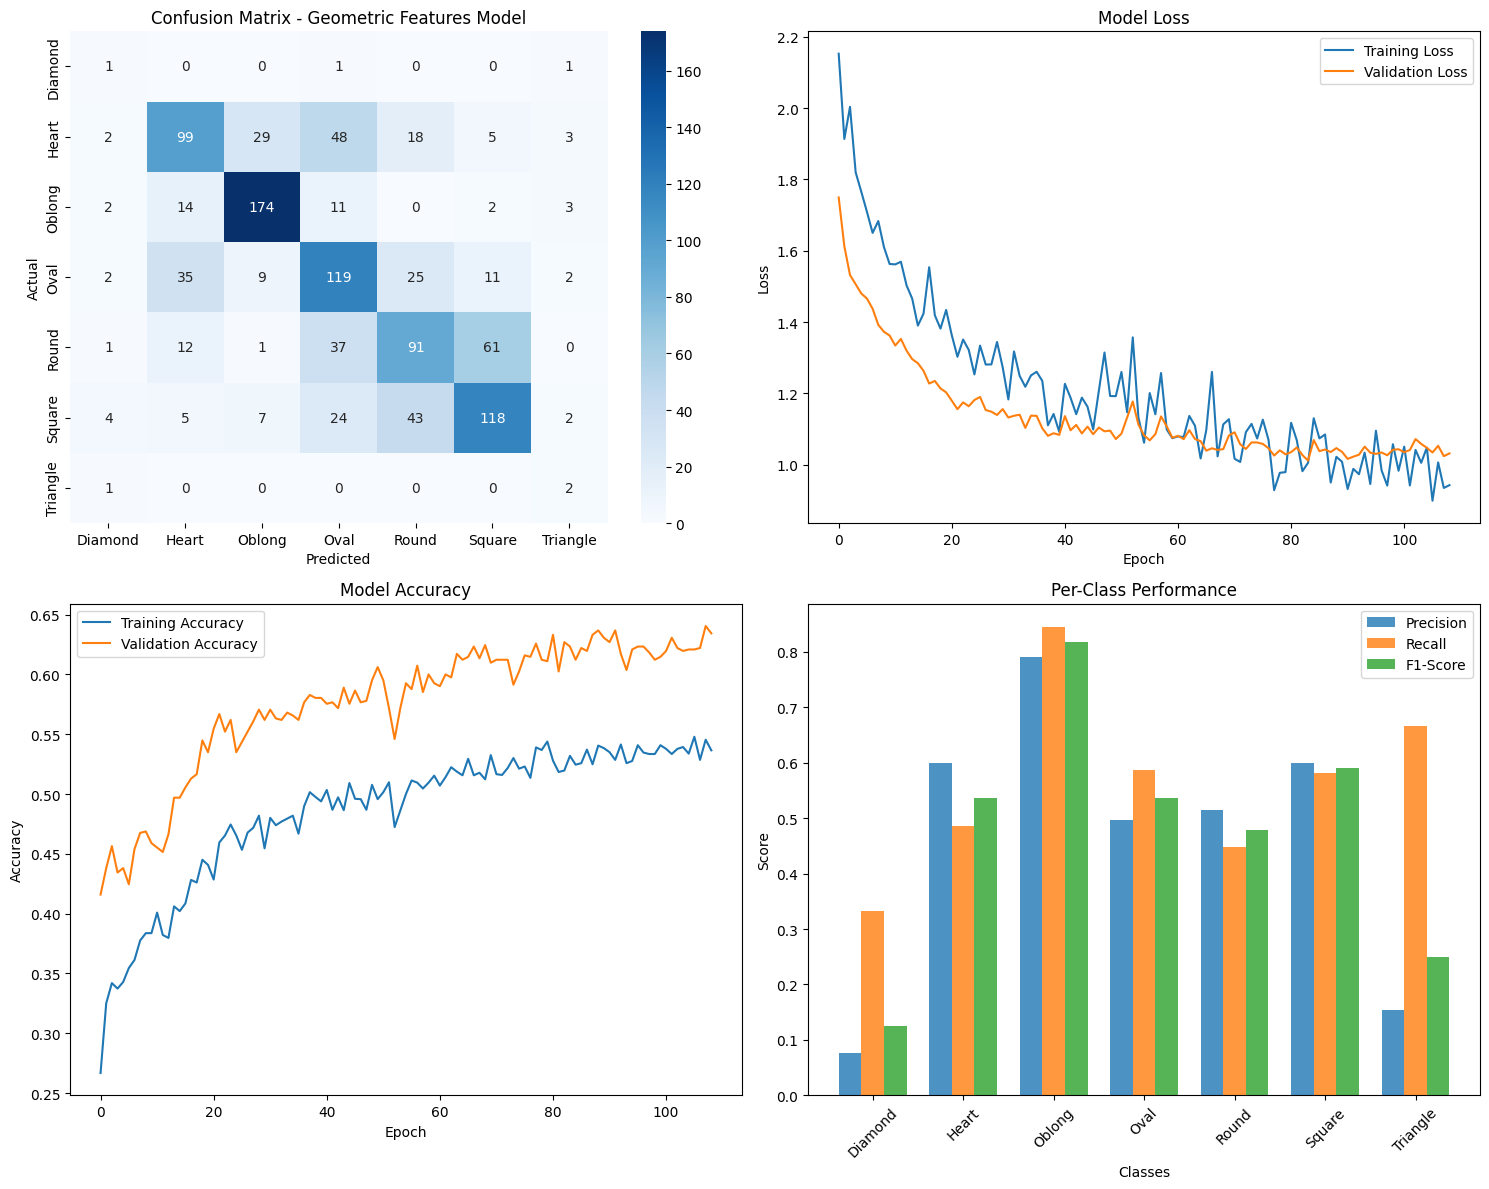


üíæ Saving model components...

üì± Converting to Core ML...
Converting geometric model with 38 features...


Translating MIL ==> NeuralNetwork Ops: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:00<00:00, 2917.54 ops/s]


‚úÖ Core ML model saved as: GeometricFaceShapeClassifier.mlmodel
‚úÖ Configuration saved as: geometric_features_config.json
‚úÖ Core ML model test successful

üéâ GEOMETRIC FEATURES TRAINING COMPLETED!
üìä Final Results:
   Accuracy: 0.5893
   Precision: 0.5977
   Recall: 0.5893
   F1-Score: 0.5902

üìÅ Generated files:
‚úÖ best_geometric_face_shape_model.h5
‚úÖ geometric_label_encoder.pkl
‚úÖ geometric_scaler.pkl
‚úÖ geometric_feature_names.json
‚úÖ GeometricFaceShapeClassifier.mlmodel
‚úÖ geometric_features_config.json

üîç Model Details:
   Input features: 38 geometric features
   Output classes: 7
   Classes: Diamond, Heart, Oblong, Oval, Round, Square, Triangle
   Training samples: 4073
   Test samples: 1025

üìà Top 10 Most Important Features:
    1. cheekbone_prominence      (variance: 1.2932)
    2. face_height_total         (variance: 1.1701)
    3. lower_proportion          (variance: 0.9218)
    4. mouth_to_face_ratio       (variance: 0.9055)
    5. avg_eye_width       

In [15]:
# 7-Class Face Shape Classifier with Geometric Features Only
# Complete runnable version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import Precision, Recall
import joblib
import json
import warnings
import os
warnings.filterwarnings('ignore')

# Core ML conversion imports
try:
    import coremltools as ct
    COREML_AVAILABLE = True
    print("‚úÖ Core ML Tools available for conversion")
except ImportError:
    COREML_AVAILABLE = False
    print("‚ö†Ô∏è Core ML Tools not available. Install with: pip install coremltools")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# ==================== DATA LOADING ====================

def load_and_preprocess_data(train_file, test_file):
    """Load and preprocess the facial landmark data for 7 classes"""
    
    print("Loading datasets...")
    try:
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
    except FileNotFoundError as e:
        print(f"‚ùå File not found: {e}")
        return None, None, None, None, None

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

    # Display label distribution
    print("\nTraining set label distribution:")
    label_counts = train_df['label'].value_counts()
    print(label_counts)
    
    # Check for class imbalance
    min_class_count = label_counts.min()
    max_class_count = label_counts.max()
    imbalance_ratio = max_class_count / min_class_count
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

    # Separate features and labels (skip image_name column)
    feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]

    X_train = train_df[feature_cols].values
    y_train = train_df['label'].values
    X_test = test_df[feature_cols].values
    y_test = test_df['label'].values

    print(f"\nOriginal landmark coordinates shape: {X_train.shape}")
    print(f"Number of landmark coordinates: {len(feature_cols)}")
    
    # Print unique classes
    unique_classes = np.unique(np.concatenate([y_train, y_test]))
    print(f"Unique classes found: {unique_classes}")
    print(f"Number of classes: {len(unique_classes)}")

    return X_train, y_train, X_test, y_test, feature_cols

# ==================== GEOMETRIC FEATURE ENGINEERING ====================

def extract_geometric_features_only(X_landmarks):
    """Extract only geometric features from landmark coordinates for face shape analysis"""
    
    n_landmarks = X_landmarks.shape[1] // 2
    landmarks = X_landmarks.reshape(-1, n_landmarks, 2)
    
    print(f"Processing {landmarks.shape[0]} faces with {n_landmarks} landmarks each...")
    
    def calculate_distance(p1, p2):
        """Calculate Euclidean distance between two points"""
        # Handle both single points and arrays of points
        if p1.ndim == 3 and p1.shape[1] == 1:
            p1 = p1.squeeze(1)
        if p2.ndim == 3 and p2.shape[1] == 1:
            p2 = p2.squeeze(1)
        return np.sqrt((p1[:, 0] - p2[:, 0])**2 + (p1[:, 1] - p2[:, 1])**2)
    
    def get_landmark_point(landmarks, idx):
        """Get a specific landmark point"""
        return landmarks[:, idx:idx+1, :]
    
    def calculate_angle(p1, p2, p3):
        """Calculate angle at p2 formed by p1-p2-p3"""
        # Squeeze extra dimensions if present
        if p1.ndim == 3:
            p1 = p1.squeeze(1)
        if p2.ndim == 3:
            p2 = p2.squeeze(1)
        if p3.ndim == 3:
            p3 = p3.squeeze(1)
            
        v1 = p1 - p2
        v2 = p3 - p2
        
        # Calculate dot product and magnitudes
        dot_product = np.sum(v1 * v2, axis=1)
        mag_v1 = np.sqrt(np.sum(v1**2, axis=1))
        mag_v2 = np.sqrt(np.sum(v2**2, axis=1))
        
        # Calculate angle in degrees
        cos_angle = dot_product / (mag_v1 * mag_v2 + 1e-8)
        cos_angle = np.clip(cos_angle, -1, 1)  # Ensure valid range for arccos
        angles = np.arccos(cos_angle) * 180 / np.pi
        
        return angles
    
    # Initialize feature list
    features = []
    feature_names = []
    
    # === FACE DIMENSIONS ===
    
    # Face width at different levels (key for face shape classification)
    face_width_top = np.abs(landmarks[:, 0, 0] - landmarks[:, 16, 0])  # Jawline ends
    face_width_upper = np.abs(landmarks[:, 1, 0] - landmarks[:, 15, 0])  # Upper jaw
    face_width_middle = np.abs(landmarks[:, 2, 0] - landmarks[:, 14, 0])  # Mid jaw
    face_width_lower = np.abs(landmarks[:, 4, 0] - landmarks[:, 12, 0])  # Lower jaw
    face_width_chin = np.abs(landmarks[:, 6, 0] - landmarks[:, 10, 0])  # Near chin
    
    features.extend([face_width_top, face_width_upper, face_width_middle, face_width_lower, face_width_chin])
    feature_names.extend(['face_width_top', 'face_width_upper', 'face_width_middle', 'face_width_lower', 'face_width_chin'])
    
    # Face height measurements
    face_height_total = landmarks[:, 8, 1] - np.min(landmarks[:, 17:27, 1], axis=1)  # Chin to forehead
    face_height_upper = np.mean(landmarks[:, 17:27, 1], axis=1) - np.mean(landmarks[:, 27:36, 1], axis=1)  # Forehead to nose
    face_height_lower = landmarks[:, 8, 1] - np.mean(landmarks[:, 48:68, 1], axis=1)  # Mouth to chin
    
    features.extend([face_height_total, face_height_upper, face_height_lower])
    feature_names.extend(['face_height_total', 'face_height_upper', 'face_height_lower'])
    
    # === CRITICAL RATIOS FOR FACE SHAPE CLASSIFICATION ===
    
    # Width-to-height ratio (most important for face shape)
    width_height_ratio = face_width_middle / (face_height_total + 1e-8)
    
    # Jaw tapering ratios (distinguishes heart from square, round from oval)
    jaw_forehead_ratio = face_width_lower / (face_width_top + 1e-8)
    cheek_jaw_ratio = face_width_middle / (face_width_lower + 1e-8)
    forehead_jaw_ratio = face_width_top / (face_width_lower + 1e-8)
    
    features.extend([width_height_ratio, jaw_forehead_ratio, cheek_jaw_ratio, forehead_jaw_ratio])
    feature_names.extend(['width_height_ratio', 'jaw_forehead_ratio', 'cheek_jaw_ratio', 'forehead_jaw_ratio'])
    
    # === JAW CHARACTERISTICS ===
    
    # Jaw angles (critical for square vs round distinction)
    left_jaw_angle = calculate_angle(
        get_landmark_point(landmarks, 2), 
        get_landmark_point(landmarks, 4), 
        get_landmark_point(landmarks, 6)
    )
    right_jaw_angle = calculate_angle(
        get_landmark_point(landmarks, 14), 
        get_landmark_point(landmarks, 12), 
        get_landmark_point(landmarks, 10)
    )
    avg_jaw_angle = (left_jaw_angle + right_jaw_angle) / 2
    
    # Chin sharpness (heart vs oval distinction)
    chin_angle = calculate_angle(
        get_landmark_point(landmarks, 6), 
        get_landmark_point(landmarks, 8), 
        get_landmark_point(landmarks, 10)
    )
    
    features.extend([left_jaw_angle, right_jaw_angle, avg_jaw_angle, chin_angle])
    feature_names.extend(['left_jaw_angle', 'right_jaw_angle', 'avg_jaw_angle', 'chin_angle'])
    
    # === FACIAL FEATURE MEASUREMENTS ===
    
    # Forehead characteristics
    forehead_width = calculate_distance(get_landmark_point(landmarks, 17), get_landmark_point(landmarks, 26))
    forehead_to_face_ratio = forehead_width / (face_width_middle + 1e-8)
    
    # Eye measurements
    left_eye_width = calculate_distance(get_landmark_point(landmarks, 42), get_landmark_point(landmarks, 45))
    right_eye_width = calculate_distance(get_landmark_point(landmarks, 36), get_landmark_point(landmarks, 39))
    
    # Calculate eye centers for distance measurement
    left_eye_center = np.mean(landmarks[:, 36:42], axis=1)
    right_eye_center = np.mean(landmarks[:, 42:48], axis=1)
    eye_distance = np.sqrt((left_eye_center[:, 0] - right_eye_center[:, 0])**2 + 
                          (left_eye_center[:, 1] - right_eye_center[:, 1])**2)
    avg_eye_width = (left_eye_width + right_eye_width) / 2
    
    # Nose measurements
    nose_width = calculate_distance(get_landmark_point(landmarks, 31), get_landmark_point(landmarks, 35))
    nose_length = calculate_distance(get_landmark_point(landmarks, 27), get_landmark_point(landmarks, 33))
    nose_to_face_ratio = nose_width / (face_width_middle + 1e-8)
    
    # Mouth measurements
    mouth_width = calculate_distance(get_landmark_point(landmarks, 48), get_landmark_point(landmarks, 54))
    mouth_height = calculate_distance(get_landmark_point(landmarks, 51), get_landmark_point(landmarks, 57))
    mouth_to_face_ratio = mouth_width / (face_width_middle + 1e-8)
    mouth_aspect_ratio = mouth_width / (mouth_height + 1e-8)
    
    features.extend([
        forehead_width, forehead_to_face_ratio,
        left_eye_width, right_eye_width, eye_distance, avg_eye_width,
        nose_width, nose_length, nose_to_face_ratio,
        mouth_width, mouth_height, mouth_to_face_ratio, mouth_aspect_ratio
    ])
    feature_names.extend([
        'forehead_width', 'forehead_to_face_ratio',
        'left_eye_width', 'right_eye_width', 'eye_distance', 'avg_eye_width',
        'nose_width', 'nose_length', 'nose_to_face_ratio',
        'mouth_width', 'mouth_height', 'mouth_to_face_ratio', 'mouth_aspect_ratio'
    ])
    
    # === SYMMETRY AND BALANCE ===
    
    # Facial symmetry measure
    face_center_x = np.mean(landmarks[:, :, 0], axis=1)
    left_side_deviation = np.mean(np.abs(landmarks[:, :17, 0] - face_center_x[:, np.newaxis]), axis=1)
    right_side_deviation = np.mean(np.abs(landmarks[:, 17:, 0] - face_center_x[:, np.newaxis]), axis=1)
    symmetry_score = 1 - np.abs(left_side_deviation - right_side_deviation) / (left_side_deviation + right_side_deviation + 1e-8)
    
    # Vertical balance
    upper_third = np.mean(landmarks[:, 17:27, 1], axis=1)  # Forehead area
    middle_third = np.mean(landmarks[:, 27:36, 1], axis=1)  # Nose area
    lower_third = landmarks[:, 8, 1]  # Chin point
    
    upper_proportion = (middle_third - upper_third) / (face_height_total + 1e-8)
    lower_proportion = (lower_third - middle_third) / (face_height_total + 1e-8)
    
    features.extend([symmetry_score, upper_proportion, lower_proportion])
    feature_names.extend(['symmetry_score', 'upper_proportion', 'lower_proportion'])
    
    # === CURVATURE MEASURES ===
    
    # Jawline curvature (distinguishes angular from curved shapes)
    jawline_points = landmarks[:, 0:17]  # Jawline landmarks
    jawline_curvature = np.std(jawline_points[:, :, 1], axis=1)  # Variance in y-coordinates
    
    # Cheekbone prominence
    cheekbone_width_1 = calculate_distance(get_landmark_point(landmarks, 1), get_landmark_point(landmarks, 15))
    cheekbone_width_2 = calculate_distance(get_landmark_point(landmarks, 2), get_landmark_point(landmarks, 14))
    cheekbone_width = np.maximum(cheekbone_width_1, cheekbone_width_2)
    cheekbone_prominence = cheekbone_width / (face_width_lower + 1e-8)
    
    features.extend([jawline_curvature, cheekbone_prominence])
    feature_names.extend(['jawline_curvature', 'cheekbone_prominence'])
    
    # === ADVANCED SHAPE DESCRIPTORS ===
    
    # Face tapering (how much face narrows from top to bottom)
    face_tapering = (face_width_top - face_width_lower) / (face_width_top + 1e-8)
    
    # Aspect ratio variations
    upper_face_aspect = face_height_upper / (forehead_width + 1e-8)
    lower_face_aspect = face_height_lower / (face_width_lower + 1e-8)
    
    # Feature positioning
    nose_position_y = landmarks[:, 33, 1]  # Nose tip y-coordinate
    mouth_position_y = np.mean(landmarks[:, 48:68, 1], axis=1)  # Mouth center y-coordinate
    nose_mouth_distance = mouth_position_y - nose_position_y
    
    features.extend([
        face_tapering, upper_face_aspect, lower_face_aspect, nose_mouth_distance
    ])
    feature_names.extend([
        'face_tapering', 'upper_face_aspect', 'lower_face_aspect', 'nose_mouth_distance'
    ])
    
    # Convert to numpy array and transpose to get (n_samples, n_features)
    geometric_features = np.column_stack(features)
    
    print(f"‚úÖ Extracted {geometric_features.shape[1]} geometric features")
    print(f"Geometric features shape: {geometric_features.shape}")
    print(f"Feature names: {feature_names[:10]}... (showing first 10)")
    
    return geometric_features, feature_names

# ==================== MODEL ARCHITECTURE ====================

def create_geometric_model(input_dim, num_classes):
    """Create neural network optimized for geometric features"""

    model = keras.Sequential([
        # Input layer with normalization
        layers.BatchNormalization(input_shape=(input_dim,)),
        
        # Feature extraction layers - smaller architecture for geometric features
        layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# ==================== TRAINING FUNCTION ====================

def train_geometric_model(X_train, y_train, X_test, y_test):
    """Train the face shape classification model using only geometric features"""

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to categorical
    num_classes = len(label_encoder.classes_)
    y_train_cat = to_categorical(y_train_encoded, num_classes)
    y_test_cat = to_categorical(y_test_encoded, num_classes)

    print(f"\nNumber of classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Scaled training features shape: {X_train_scaled.shape}")
    print(f"Feature scaling complete")

    # Create validation split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_scaled, y_train_cat, test_size=0.2, random_state=42, stratify=y_train_encoded
    )

    print(f"Training split: {X_train_split.shape}")
    print(f"Validation split: {X_val_split.shape}")

    # Create model
    model = create_geometric_model(X_train_scaled.shape[1], num_classes)

    # Calculate class weights for imbalanced data
    unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
    total_samples = len(y_train_encoded)
    class_weights = {}
    for i, class_count in enumerate(class_counts):
        class_weights[i] = total_samples / (num_classes * class_count)

    print(f"Class weights: {class_weights}")

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\nModel Architecture:")
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_geometric_face_shape_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7,
            verbose=1
        )
    ]

    # Train model
    print("\nStarting training with geometric features only...")
    history = model.fit(
        X_train_split, y_train_split,
        batch_size=32,
        epochs=150,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    # Load best model
    model = keras.models.load_model('best_geometric_face_shape_model.h5')

    # Make predictions
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

    return model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler

# ==================== EVALUATION ====================

def evaluate_model(y_true, y_pred, y_pred_proba, label_encoder, history):
    """Evaluate the model performance"""

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("\n" + "="*60)
    print("GEOMETRIC FEATURES MODEL EVALUATION")
    print("="*60)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix - Geometric Features Model')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # Training History - Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()

    # Training History - Accuracy
    axes[1,0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1,0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1,0].set_title('Model Accuracy')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()

    # Class Performance
    precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )

    x_pos = np.arange(len(label_encoder.classes_))
    width = 0.25
    axes[1,1].bar(x_pos - width, precision_per_class, width, label='Precision', alpha=0.8)
    axes[1,1].bar(x_pos, recall_per_class, width, label='Recall', alpha=0.8)
    axes[1,1].bar(x_pos + width, f1_per_class, width, label='F1-Score', alpha=0.8)
    axes[1,1].set_title('Per-Class Performance')
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(label_encoder.classes_, rotation=45)
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

# ==================== CORE ML CONVERSION ====================

def convert_to_coreml(model, scaler, label_encoder, feature_names):
    """Convert geometric features model to Core ML format"""
    
    if not COREML_AVAILABLE:
        print("‚ö†Ô∏è Core ML Tools not available")
        return None
    
    try:
        input_shape = model.input_shape[1]
        print(f"Converting geometric model with {input_shape} features...")
        
        # Create a clean model without batch normalization for Core ML
        inputs = keras.Input(shape=(input_shape,), name='geometric_features')
        
        # Recreate model architecture without batch normalization
        x = inputs
        x = keras.layers.Dense(128, activation='relu', name='dense_1')(x)
        x = keras.layers.Dropout(0.3, name='dropout_1')(x)
        x = keras.layers.Dense(64, activation='relu', name='dense_2')(x)
        x = keras.layers.Dropout(0.4, name='dropout_2')(x)
        x = keras.layers.Dense(32, activation='relu', name='dense_3')(x)
        x = keras.layers.Dropout(0.3, name='dropout_3')(x)
        x = keras.layers.Dense(16, activation='relu', name='dense_4')(x)
        outputs = keras.layers.Dense(len(label_encoder.classes_), activation='softmax', name='predictions')(x)
        
        clean_model = keras.Model(inputs=inputs, outputs=outputs, name='GeometricFaceShapeClassifier')
        
        # Transfer weights from the original model (skip batch norm layers)
        original_dense_layers = [layer for layer in model.layers if isinstance(layer, keras.layers.Dense)]
        clean_dense_layers = [layer for layer in clean_model.layers if isinstance(layer, keras.layers.Dense)]
        
        for orig_layer, clean_layer in zip(original_dense_layers, clean_dense_layers):
            clean_layer.set_weights(orig_layer.get_weights())
        
        # Convert to Core ML
        coreml_model = ct.convert(
            clean_model,
            inputs=[ct.TensorType(shape=(1, input_shape), name="geometric_features")],
            minimum_deployment_target=ct.target.iOS13,
        )
        
        # Add metadata
        coreml_model.short_description = "Face Shape Classification using Geometric Features"
        coreml_model.version = "1.0"
        coreml_model.author = "Geometric Features Face Classifier"
        
        # Save model
        coreml_model.save("GeometricFaceShapeClassifier.mlmodel")
        print("‚úÖ Core ML model saved as: GeometricFaceShapeClassifier.mlmodel")
        
        # Save preprocessing config
        config = {
            'scaler_center': scaler.center_.tolist(),
            'scaler_scale': scaler.scale_.tolist(),
            'scaler_type': 'RobustScaler',
            'feature_names': feature_names,
            'input_features': input_shape,
            'classes': label_encoder.classes_.tolist(),
            'num_classes': len(label_encoder.classes_),
            'model_type': 'geometric_features_only',
            'model_version': '1.0'
        }
        
        with open('geometric_features_config.json', 'w') as f:
            json.dump(config, f, indent=2)
        
        print("‚úÖ Configuration saved as: geometric_features_config.json")
        
        # Test the Core ML model
        try:
            test_input = np.random.randn(1, input_shape).astype(np.float32)
            prediction = coreml_model.predict({"geometric_features": test_input})
            print("‚úÖ Core ML model test successful")
            
        except Exception as test_error:
            print(f"‚ö†Ô∏è Core ML model test failed: {test_error}")
        
        return coreml_model
        
    except Exception as e:
        print(f"‚ùå Core ML conversion failed: {e}")
        return None

# ==================== MAIN EXECUTION ====================

def main():
    """Main training pipeline for geometric features only"""
    
    print("üöÄ Starting Geometric Features Face Shape Classification")
    print("="*60)
    
    # Update these paths to your actual CSV files
    train_file = 'processed_landmarks_2/training_set_landmarks.csv'
    test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
    
    # For this example, let's use the provided test file as both train and test
    # You should update these paths to your actual files
    if not os.path.exists(train_file):
        print(f"‚ö†Ô∏è Training file not found: {train_file}")
        print("Using test file for demonstration...")
        train_file = 'testing_set_landmarks.csv'
        test_file = 'testing_set_landmarks.csv'
    
    # Load data
    result = load_and_preprocess_data(train_file, test_file)
    if result[0] is None:
        return
    
    X_train_landmarks, y_train, X_test_landmarks, y_test, feature_cols = result
    
    # Extract ONLY geometric features
    print("\nüîß Extracting geometric features from landmarks...")
    X_train_geometric, feature_names = extract_geometric_features_only(X_train_landmarks)
    X_test_geometric, _ = extract_geometric_features_only(X_test_landmarks)
    
    print(f"\nüìä Dataset Summary:")
    print(f"Training samples: {X_train_geometric.shape[0]}")
    print(f"Test samples: {X_test_geometric.shape[0]}")
    print(f"Geometric features: {X_train_geometric.shape[1]}")
    print(f"Original landmarks: {X_train_landmarks.shape[1]} coordinates")
    print(f"Feature reduction: {X_train_landmarks.shape[1]} ‚Üí {X_train_geometric.shape[1]} ({X_train_geometric.shape[1]/X_train_landmarks.shape[1]*100:.1f}%)")
    
    # Train model using only geometric features
    print("\nüéØ Training model with geometric features only...")
    model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler = train_geometric_model(
        X_train_geometric, y_train, X_test_geometric, y_test
    )
    
    # Evaluate model
    accuracy, precision, recall, f1 = evaluate_model(y_test_encoded, y_pred, y_pred_proba, label_encoder, history)
    
    # Save components
    print("\nüíæ Saving model components...")
    joblib.dump(label_encoder, 'geometric_label_encoder.pkl')
    joblib.dump(scaler, 'geometric_scaler.pkl')
    
    # Save feature names for future reference
    with open('geometric_feature_names.json', 'w') as f:
        json.dump(feature_names, f, indent=2)
    
    # Convert to Core ML
    print("\nüì± Converting to Core ML...")
    coreml_model = convert_to_coreml(model, scaler, label_encoder, feature_names)
    
    print("\n" + "="*60)
    print("üéâ GEOMETRIC FEATURES TRAINING COMPLETED!")
    print("="*60)
    print("üìä Final Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print("\nüìÅ Generated files:")
    print("‚úÖ best_geometric_face_shape_model.h5")
    print("‚úÖ geometric_label_encoder.pkl")  
    print("‚úÖ geometric_scaler.pkl")
    print("‚úÖ geometric_feature_names.json")
    if coreml_model:
        print("‚úÖ GeometricFaceShapeClassifier.mlmodel")
        print("‚úÖ geometric_features_config.json")
    
    print(f"\nüîç Model Details:")
    print(f"   Input features: {X_train_geometric.shape[1]} geometric features")
    print(f"   Output classes: {len(label_encoder.classes_)}")
    print(f"   Classes: {', '.join(label_encoder.classes_)}")
    print(f"   Training samples: {X_train_geometric.shape[0]}")
    print(f"   Test samples: {X_test_geometric.shape[0]}")
    
    # Feature importance analysis
    print(f"\nüìà Top 10 Most Important Features:")
    # Simple feature importance based on variance after scaling
    feature_importance = np.var(scaler.transform(X_train_geometric), axis=0)
    top_features_idx = np.argsort(feature_importance)[-10:][::-1]
    
    for i, idx in enumerate(top_features_idx):
        print(f"   {i+1:2d}. {feature_names[idx]:25s} (variance: {feature_importance[idx]:.4f})")
    
    return model, label_encoder, scaler, feature_names

# ==================== PREDICTION FUNCTION ====================

def predict_face_shape(landmarks_array, model, scaler, label_encoder, feature_names):
    """
    Predict face shape from landmark coordinates
    
    Args:
        landmarks_array: numpy array of shape (136,) containing x,y coordinates for 68 landmarks
        model: trained Keras model
        scaler: fitted scaler
        label_encoder: fitted label encoder
        feature_names: list of feature names
    
    Returns:
        dict: prediction results with probabilities
    """
    
    # Reshape landmarks to (1, 136) if needed
    if landmarks_array.ndim == 1:
        landmarks_array = landmarks_array.reshape(1, -1)
    
    # Extract geometric features
    geometric_features, _ = extract_geometric_features_only(landmarks_array)
    
    # Scale features
    geometric_features_scaled = scaler.transform(geometric_features)
    
    # Make prediction
    prediction_proba = model.predict(geometric_features_scaled, verbose=0)
    predicted_class_idx = np.argmax(prediction_proba[0])
    predicted_class = label_encoder.classes_[predicted_class_idx]
    confidence = prediction_proba[0][predicted_class_idx]
    
    # Create probability dictionary
    class_probabilities = {}
    for i, class_name in enumerate(label_encoder.classes_):
        class_probabilities[class_name] = float(prediction_proba[0][i])
    
    return {
        'predicted_class': predicted_class,
        'confidence': float(confidence),
        'all_probabilities': class_probabilities,
        'geometric_features': geometric_features[0].tolist(),
        'feature_names': feature_names
    }

# ==================== DEMO FUNCTION ====================

def demo_prediction(model, scaler, label_encoder, feature_names, test_data, test_labels):
    """Demo the prediction function with sample data"""
    
    print("\n" + "="*60)
    print("üéØ PREDICTION DEMO")
    print("="*60)
    
    # Select a few random samples for demo
    n_demos = 5
    demo_indices = np.random.choice(len(test_data), n_demos, replace=False)
    
    print(f"Demonstrating predictions on {n_demos} random test samples:\n")
    
    for i, idx in enumerate(demo_indices):
        sample_landmarks = test_data[idx]
        true_label = test_labels[idx]
        
        # Make prediction
        result = predict_face_shape(sample_landmarks, model, scaler, label_encoder, feature_names)
        
        print(f"Sample {i+1}:")
        print(f"   True Label: {true_label}")
        print(f"   Predicted: {result['predicted_class']} (confidence: {result['confidence']:.3f})")
        
        # Show top 3 predictions
        sorted_probs = sorted(result['all_probabilities'].items(), key=lambda x: x[1], reverse=True)
        print(f"   Top 3 predictions:")
        for j, (class_name, prob) in enumerate(sorted_probs[:3]):
            print(f"      {j+1}. {class_name}: {prob:.3f}")
        
        # Show some key geometric features
        key_features = ['width_height_ratio', 'jaw_forehead_ratio', 'avg_jaw_angle', 'chin_angle']
        print(f"   Key geometric features:")
        for feature in key_features:
            if feature in feature_names:
                feat_idx = feature_names.index(feature)
                feat_value = result['geometric_features'][feat_idx]
                print(f"      {feature}: {feat_value:.4f}")
        
        print()

if __name__ == "__main__":
    # Run the training
    result = main()
    if result is not None:
        model, label_encoder, scaler, feature_names = result
        print("üéâ Training completed successfully!")
        
        # Load test data for demo
        try:
            test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
            if os.path.exists(test_file):
                test_df = pd.read_csv(test_file)
                feature_cols = [col for col in test_df.columns if col.startswith('landmark_')]
                test_landmarks = test_df[feature_cols].values
                test_labels = test_df['label'].values
                
                # Run demo
                demo_prediction(model, scaler, label_encoder, feature_names, test_landmarks, test_labels)
            else:
                print("‚ö†Ô∏è Test file not found for demo")
        except Exception as e:
            print(f"‚ö†Ô∏è Demo failed: {e}")
    else:
        print("‚ùå Training failed. Please check file paths and try again.")

‚úÖ SMOTE available for handling imbalanced data
‚úÖ Core ML Tools available for conversion
TensorFlow Version: 2.13.0
GPU Available: False
üöÄ Starting Geometric Features Face Shape Classification with SMOTE
Loading datasets...
Training set shape: (4073, 138)
Testing set shape: (1025, 138)

Training set label distribution:
label
Oblong      813
Square      811
Oval        811
Heart       810
Round       809
Triangle     10
Diamond       9
Name: count, dtype: int64
Class imbalance ratio: 90.33

Original landmark coordinates shape: (4073, 136)
Number of landmark coordinates: 136
Unique classes found: ['Diamond' 'Heart' 'Oblong' 'Oval' 'Round' 'Square' 'Triangle']
Number of classes: 7

üîß Extracting geometric features from landmarks...
Processing 4073 faces with 68 landmarks each...
‚úÖ Extracted 38 geometric features
Geometric features shape: (4073, 38)
Feature names: ['face_width_top', 'face_width_upper', 'face_width_middle', 'face_width_lower', 'face_width_chin', 'face_height_total

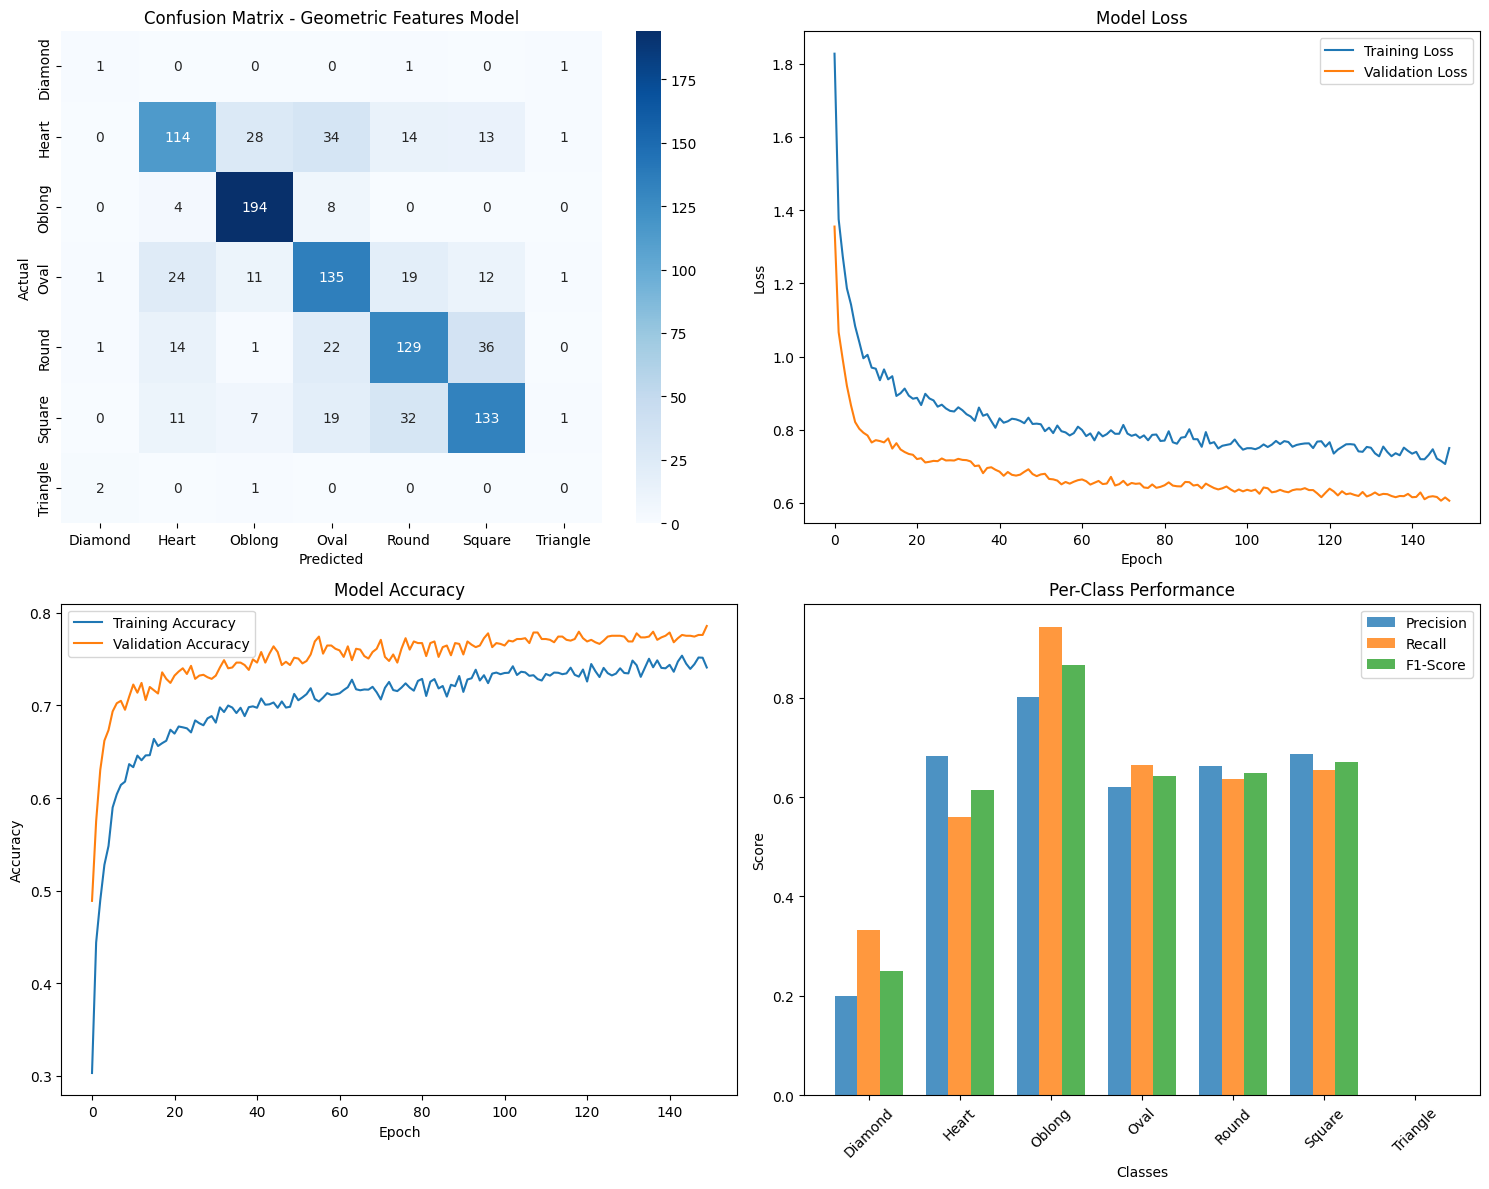


üíæ Saving model components...

üì± Converting to Core ML...
Converting geometric model with 38 features...


Translating MIL ==> NeuralNetwork Ops: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:00<00:00, 2799.58 ops/s]


‚úÖ Core ML model saved as: GeometricFaceShapeClassifier.mlmodel
‚úÖ Configuration saved as: geometric_features_config.json
‚úÖ Core ML model test successful

üéâ GEOMETRIC FEATURES + SMOTE TRAINING COMPLETED!
üìä Final Results:
   Accuracy: 0.6888
   Precision: 0.6870
   Recall: 0.6888
   F1-Score: 0.6852

üìÅ Generated files:
‚úÖ best_geometric_face_shape_model_with_smote.h5
‚úÖ geometric_label_encoder_with_smote.pkl
‚úÖ geometric_scaler_with_smote.pkl
‚úÖ geometric_feature_names_with_smote.json
‚úÖ GeometricFaceShapeClassifier.mlmodel
‚úÖ geometric_features_config.json

üîç Model Details:
   Input features: 38 geometric features
   Output classes: 7
   Classes: Diamond, Heart, Oblong, Oval, Round, Square, Triangle
   Training samples: 4073
   Test samples: 1025

üìà Top 10 Most Important Features:
    1. cheekbone_prominence      (variance: 1.6207)
    2. mouth_to_face_ratio       (variance: 1.1210)
    3. face_width_top            (variance: 1.1074)
    4. face_height_total   

In [17]:
# 7-Class Face Shape Classifier with Geometric Features Only
# Complete runnable version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import Precision, Recall
import joblib
import json
import warnings
import os
warnings.filterwarnings('ignore')

# SMOTE for handling imbalanced datasets
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.combine import SMOTETomek
    from imblearn.under_sampling import TomekLinks
    SMOTE_AVAILABLE = True
    print("‚úÖ SMOTE available for handling imbalanced data")
except ImportError:
    SMOTE_AVAILABLE = False
    print("‚ö†Ô∏è SMOTE not available. Install with: pip install imbalanced-learn")

# Core ML conversion imports
try:
    import coremltools as ct
    COREML_AVAILABLE = True
    print("‚úÖ Core ML Tools available for conversion")
except ImportError:
    COREML_AVAILABLE = False
    print("‚ö†Ô∏è Core ML Tools not available. Install with: pip install coremltools")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# ==================== DATA LOADING ====================

def load_and_preprocess_data(train_file, test_file):
    """Load and preprocess the facial landmark data for 7 classes"""
    
    print("Loading datasets...")
    try:
        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)
    except FileNotFoundError as e:
        print(f"‚ùå File not found: {e}")
        return None, None, None, None, None

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

    # Display label distribution
    print("\nTraining set label distribution:")
    label_counts = train_df['label'].value_counts()
    print(label_counts)
    
    # Check for class imbalance
    min_class_count = label_counts.min()
    max_class_count = label_counts.max()
    imbalance_ratio = max_class_count / min_class_count
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

    # Separate features and labels (skip image_name column)
    feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]

    X_train = train_df[feature_cols].values
    y_train = train_df['label'].values
    X_test = test_df[feature_cols].values
    y_test = test_df['label'].values

    print(f"\nOriginal landmark coordinates shape: {X_train.shape}")
    print(f"Number of landmark coordinates: {len(feature_cols)}")
    
    # Print unique classes
    unique_classes = np.unique(np.concatenate([y_train, y_test]))
    print(f"Unique classes found: {unique_classes}")
    print(f"Number of classes: {len(unique_classes)}")

    return X_train, y_train, X_test, y_test, feature_cols

# ==================== SMOTE APPLICATION ====================

def apply_smote_balancing(X_train, y_train, strategy='auto'):
    """Apply SMOTE to balance the training dataset"""
    
    if not SMOTE_AVAILABLE:
        print("‚ö†Ô∏è SMOTE not available. Proceeding without data balancing.")
        return X_train, y_train
    
    print("\n" + "="*50)
    print("APPLYING SMOTE FOR DATA BALANCING")
    print("="*50)
    
    # Check original distribution
    unique_labels, counts = np.unique(y_train, return_counts=True)
    print(f"Original distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"  {label}: {count} samples")
    
    total_original = len(y_train)
    print(f"Total original samples: {total_original}")
    
    try:
        min_samples = min(counts)
        max_samples = max(counts)
        imbalance_ratio = max_samples / min_samples
        
        print(f"Class imbalance ratio: {imbalance_ratio:.2f}")
        
        # Apply SMOTE based on strategy
        if strategy == 'force':
            print("üîÑ Forcing SMOTE to increase dataset size...")
            # Increase all classes to 1.5x the current maximum
            target_samples = int(max_samples * 1.5)
            sampling_strategy = {}
            
            for label, count in zip(unique_labels, counts):
                if count < target_samples:
                    sampling_strategy[label] = target_samples
                    print(f"  Will increase {label}: {count} ‚Üí {target_samples}")
                else:
                    print(f"  Keeping {label}: {count} samples")
            
            if sampling_strategy:  # Only apply SMOTE if there's something to balance
                smote = SMOTE(
                    sampling_strategy=sampling_strategy,
                    random_state=42,
                    k_neighbors=min(3, min_samples-1)
                )
                print("üîÑ Applying SMOTE transformation...")
                X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
                print("‚úÖ SMOTE transformation completed!")
            else:
                print("‚ÑπÔ∏è No SMOTE needed - all classes already at target size")
                X_balanced, y_balanced = X_train, y_train
                
        elif strategy == 'auto' and imbalance_ratio > 2.0:
            print("üîÑ Using automatic SMOTE...")
            smote = SMOTE(
                sampling_strategy='auto',
                random_state=42,
                k_neighbors=min(3, min_samples-1)
            )
            X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
            
        elif strategy == 'combined' and imbalance_ratio > 5:
            print("üîÑ Using SMOTETomek for severe imbalance...")
            smote_tomek = SMOTETomek(
                smote=SMOTE(random_state=42, k_neighbors=min(3, min_samples-1)),
                tomek=TomekLinks(),
                random_state=42
            )
            X_balanced, y_balanced = smote_tomek.fit_resample(X_train, y_train)
            
        else:
            print("‚ÑπÔ∏è Data appears balanced enough - skipping SMOTE")
            return X_train, y_train
    
    except Exception as e:
        print(f"‚ùå SMOTE failed: {e}")
        print("Proceeding with original data...")
        return X_train, y_train
    
    # Check new distribution
    unique_labels_new, counts_new = np.unique(y_balanced, return_counts=True)
    print(f"\nüìä FINAL DISTRIBUTION AFTER SMOTE:")
    for label, count in zip(unique_labels_new, counts_new):
        original_count = counts[list(unique_labels).index(label)] if label in unique_labels else 0
        synthetic_count = count - original_count
        print(f"  {label}: {count} total ({original_count} original + {synthetic_count} synthetic)")
    
    total_new = len(y_balanced)
    synthetic_added = total_new - total_original
    print(f"\nüìà SMOTE SUMMARY:")
    print(f"  Original samples: {total_original}")
    print(f"  Final samples: {total_new}")
    print(f"  Synthetic samples added: {synthetic_added}")
    print(f"  Data increase: {total_new/total_original:.2f}x")
    print("="*50)
    
    return X_balanced, y_balanced

# ==================== GEOMETRIC FEATURE ENGINEERING ====================

def extract_geometric_features_only(X_landmarks):
    """Extract only geometric features from landmark coordinates for face shape analysis"""
    
    n_landmarks = X_landmarks.shape[1] // 2
    landmarks = X_landmarks.reshape(-1, n_landmarks, 2)
    
    print(f"Processing {landmarks.shape[0]} faces with {n_landmarks} landmarks each...")
    
    def calculate_distance(p1, p2):
        """Calculate Euclidean distance between two points"""
        # Handle both single points and arrays of points
        if p1.ndim == 3 and p1.shape[1] == 1:
            p1 = p1.squeeze(1)
        if p2.ndim == 3 and p2.shape[1] == 1:
            p2 = p2.squeeze(1)
        return np.sqrt((p1[:, 0] - p2[:, 0])**2 + (p1[:, 1] - p2[:, 1])**2)
    
    def get_landmark_point(landmarks, idx):
        """Get a specific landmark point"""
        return landmarks[:, idx:idx+1, :]
    
    def calculate_angle(p1, p2, p3):
        """Calculate angle at p2 formed by p1-p2-p3"""
        # Squeeze extra dimensions if present
        if p1.ndim == 3:
            p1 = p1.squeeze(1)
        if p2.ndim == 3:
            p2 = p2.squeeze(1)
        if p3.ndim == 3:
            p3 = p3.squeeze(1)
            
        v1 = p1 - p2
        v2 = p3 - p2
        
        # Calculate dot product and magnitudes
        dot_product = np.sum(v1 * v2, axis=1)
        mag_v1 = np.sqrt(np.sum(v1**2, axis=1))
        mag_v2 = np.sqrt(np.sum(v2**2, axis=1))
        
        # Calculate angle in degrees
        cos_angle = dot_product / (mag_v1 * mag_v2 + 1e-8)
        cos_angle = np.clip(cos_angle, -1, 1)  # Ensure valid range for arccos
        angles = np.arccos(cos_angle) * 180 / np.pi
        
        return angles
    
    # Initialize feature list
    features = []
    feature_names = []
    
    # === FACE DIMENSIONS ===
    
    # Face width at different levels (key for face shape classification)
    face_width_top = np.abs(landmarks[:, 0, 0] - landmarks[:, 16, 0])  # Jawline ends
    face_width_upper = np.abs(landmarks[:, 1, 0] - landmarks[:, 15, 0])  # Upper jaw
    face_width_middle = np.abs(landmarks[:, 2, 0] - landmarks[:, 14, 0])  # Mid jaw
    face_width_lower = np.abs(landmarks[:, 4, 0] - landmarks[:, 12, 0])  # Lower jaw
    face_width_chin = np.abs(landmarks[:, 6, 0] - landmarks[:, 10, 0])  # Near chin
    
    features.extend([face_width_top, face_width_upper, face_width_middle, face_width_lower, face_width_chin])
    feature_names.extend(['face_width_top', 'face_width_upper', 'face_width_middle', 'face_width_lower', 'face_width_chin'])
    
    # Face height measurements
    face_height_total = landmarks[:, 8, 1] - np.min(landmarks[:, 17:27, 1], axis=1)  # Chin to forehead
    face_height_upper = np.mean(landmarks[:, 17:27, 1], axis=1) - np.mean(landmarks[:, 27:36, 1], axis=1)  # Forehead to nose
    face_height_lower = landmarks[:, 8, 1] - np.mean(landmarks[:, 48:68, 1], axis=1)  # Mouth to chin
    
    features.extend([face_height_total, face_height_upper, face_height_lower])
    feature_names.extend(['face_height_total', 'face_height_upper', 'face_height_lower'])
    
    # === CRITICAL RATIOS FOR FACE SHAPE CLASSIFICATION ===
    
    # Width-to-height ratio (most important for face shape)
    width_height_ratio = face_width_middle / (face_height_total + 1e-8)
    
    # Jaw tapering ratios (distinguishes heart from square, round from oval)
    jaw_forehead_ratio = face_width_lower / (face_width_top + 1e-8)
    cheek_jaw_ratio = face_width_middle / (face_width_lower + 1e-8)
    forehead_jaw_ratio = face_width_top / (face_width_lower + 1e-8)
    
    features.extend([width_height_ratio, jaw_forehead_ratio, cheek_jaw_ratio, forehead_jaw_ratio])
    feature_names.extend(['width_height_ratio', 'jaw_forehead_ratio', 'cheek_jaw_ratio', 'forehead_jaw_ratio'])
    
    # === JAW CHARACTERISTICS ===
    
    # Jaw angles (critical for square vs round distinction)
    left_jaw_angle = calculate_angle(
        get_landmark_point(landmarks, 2), 
        get_landmark_point(landmarks, 4), 
        get_landmark_point(landmarks, 6)
    )
    right_jaw_angle = calculate_angle(
        get_landmark_point(landmarks, 14), 
        get_landmark_point(landmarks, 12), 
        get_landmark_point(landmarks, 10)
    )
    avg_jaw_angle = (left_jaw_angle + right_jaw_angle) / 2
    
    # Chin sharpness (heart vs oval distinction)
    chin_angle = calculate_angle(
        get_landmark_point(landmarks, 6), 
        get_landmark_point(landmarks, 8), 
        get_landmark_point(landmarks, 10)
    )
    
    features.extend([left_jaw_angle, right_jaw_angle, avg_jaw_angle, chin_angle])
    feature_names.extend(['left_jaw_angle', 'right_jaw_angle', 'avg_jaw_angle', 'chin_angle'])
    
    # === FACIAL FEATURE MEASUREMENTS ===
    
    # Forehead characteristics
    forehead_width = calculate_distance(get_landmark_point(landmarks, 17), get_landmark_point(landmarks, 26))
    forehead_to_face_ratio = forehead_width / (face_width_middle + 1e-8)
    
    # Eye measurements
    left_eye_width = calculate_distance(get_landmark_point(landmarks, 42), get_landmark_point(landmarks, 45))
    right_eye_width = calculate_distance(get_landmark_point(landmarks, 36), get_landmark_point(landmarks, 39))
    
    # Calculate eye centers for distance measurement
    left_eye_center = np.mean(landmarks[:, 36:42], axis=1)
    right_eye_center = np.mean(landmarks[:, 42:48], axis=1)
    eye_distance = np.sqrt((left_eye_center[:, 0] - right_eye_center[:, 0])**2 + 
                          (left_eye_center[:, 1] - right_eye_center[:, 1])**2)
    avg_eye_width = (left_eye_width + right_eye_width) / 2
    
    # Nose measurements
    nose_width = calculate_distance(get_landmark_point(landmarks, 31), get_landmark_point(landmarks, 35))
    nose_length = calculate_distance(get_landmark_point(landmarks, 27), get_landmark_point(landmarks, 33))
    nose_to_face_ratio = nose_width / (face_width_middle + 1e-8)
    
    # Mouth measurements
    mouth_width = calculate_distance(get_landmark_point(landmarks, 48), get_landmark_point(landmarks, 54))
    mouth_height = calculate_distance(get_landmark_point(landmarks, 51), get_landmark_point(landmarks, 57))
    mouth_to_face_ratio = mouth_width / (face_width_middle + 1e-8)
    mouth_aspect_ratio = mouth_width / (mouth_height + 1e-8)
    
    features.extend([
        forehead_width, forehead_to_face_ratio,
        left_eye_width, right_eye_width, eye_distance, avg_eye_width,
        nose_width, nose_length, nose_to_face_ratio,
        mouth_width, mouth_height, mouth_to_face_ratio, mouth_aspect_ratio
    ])
    feature_names.extend([
        'forehead_width', 'forehead_to_face_ratio',
        'left_eye_width', 'right_eye_width', 'eye_distance', 'avg_eye_width',
        'nose_width', 'nose_length', 'nose_to_face_ratio',
        'mouth_width', 'mouth_height', 'mouth_to_face_ratio', 'mouth_aspect_ratio'
    ])
    
    # === SYMMETRY AND BALANCE ===
    
    # Facial symmetry measure
    face_center_x = np.mean(landmarks[:, :, 0], axis=1)
    left_side_deviation = np.mean(np.abs(landmarks[:, :17, 0] - face_center_x[:, np.newaxis]), axis=1)
    right_side_deviation = np.mean(np.abs(landmarks[:, 17:, 0] - face_center_x[:, np.newaxis]), axis=1)
    symmetry_score = 1 - np.abs(left_side_deviation - right_side_deviation) / (left_side_deviation + right_side_deviation + 1e-8)
    
    # Vertical balance
    upper_third = np.mean(landmarks[:, 17:27, 1], axis=1)  # Forehead area
    middle_third = np.mean(landmarks[:, 27:36, 1], axis=1)  # Nose area
    lower_third = landmarks[:, 8, 1]  # Chin point
    
    upper_proportion = (middle_third - upper_third) / (face_height_total + 1e-8)
    lower_proportion = (lower_third - middle_third) / (face_height_total + 1e-8)
    
    features.extend([symmetry_score, upper_proportion, lower_proportion])
    feature_names.extend(['symmetry_score', 'upper_proportion', 'lower_proportion'])
    
    # === CURVATURE MEASURES ===
    
    # Jawline curvature (distinguishes angular from curved shapes)
    jawline_points = landmarks[:, 0:17]  # Jawline landmarks
    jawline_curvature = np.std(jawline_points[:, :, 1], axis=1)  # Variance in y-coordinates
    
    # Cheekbone prominence
    cheekbone_width_1 = calculate_distance(get_landmark_point(landmarks, 1), get_landmark_point(landmarks, 15))
    cheekbone_width_2 = calculate_distance(get_landmark_point(landmarks, 2), get_landmark_point(landmarks, 14))
    cheekbone_width = np.maximum(cheekbone_width_1, cheekbone_width_2)
    cheekbone_prominence = cheekbone_width / (face_width_lower + 1e-8)
    
    features.extend([jawline_curvature, cheekbone_prominence])
    feature_names.extend(['jawline_curvature', 'cheekbone_prominence'])
    
    # === ADVANCED SHAPE DESCRIPTORS ===
    
    # Face tapering (how much face narrows from top to bottom)
    face_tapering = (face_width_top - face_width_lower) / (face_width_top + 1e-8)
    
    # Aspect ratio variations
    upper_face_aspect = face_height_upper / (forehead_width + 1e-8)
    lower_face_aspect = face_height_lower / (face_width_lower + 1e-8)
    
    # Feature positioning
    nose_position_y = landmarks[:, 33, 1]  # Nose tip y-coordinate
    mouth_position_y = np.mean(landmarks[:, 48:68, 1], axis=1)  # Mouth center y-coordinate
    nose_mouth_distance = mouth_position_y - nose_position_y
    
    features.extend([
        face_tapering, upper_face_aspect, lower_face_aspect, nose_mouth_distance
    ])
    feature_names.extend([
        'face_tapering', 'upper_face_aspect', 'lower_face_aspect', 'nose_mouth_distance'
    ])
    
    # Convert to numpy array and transpose to get (n_samples, n_features)
    geometric_features = np.column_stack(features)
    
    print(f"‚úÖ Extracted {geometric_features.shape[1]} geometric features")
    print(f"Geometric features shape: {geometric_features.shape}")
    print(f"Feature names: {feature_names[:10]}... (showing first 10)")
    
    return geometric_features, feature_names

# ==================== MODEL ARCHITECTURE ====================

def create_geometric_model(input_dim, num_classes):
    """Create neural network optimized for geometric features"""

    model = keras.Sequential([
        # Input layer with normalization
        layers.BatchNormalization(input_shape=(input_dim,)),
        
        # Feature extraction layers - smaller architecture for geometric features
        layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# ==================== TRAINING FUNCTION ====================

def train_geometric_model(X_train, y_train, X_test, y_test, use_smote=True, smote_strategy='auto'):
    """Train the face shape classification model using only geometric features"""

    print(f"\nüéØ Training Configuration:")
    print(f"   Use SMOTE: {use_smote}")
    print(f"   SMOTE Strategy: {smote_strategy}")
    print(f"   Original training samples: {X_train.shape[0]}")

    # Apply SMOTE if requested
    if use_smote:
        X_train_balanced, y_train_balanced = apply_smote_balancing(X_train, y_train, strategy=smote_strategy)
        print(f"   After SMOTE: {X_train_balanced.shape[0]} samples")
    else:
        X_train_balanced, y_train_balanced = X_train, y_train
        print(f"   No SMOTE applied - using original {X_train.shape[0]} samples")

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_balanced)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert to categorical
    num_classes = len(label_encoder.classes_)
    y_train_cat = to_categorical(y_train_encoded, num_classes)
    y_test_cat = to_categorical(y_test_encoded, num_classes)

    print(f"\nüìä Model Configuration:")
    print(f"   Number of classes: {num_classes}")
    print(f"   Classes: {label_encoder.classes_}")
    print(f"   Training samples: {X_train_balanced.shape[0]}")
    print(f"   Feature dimensions: {X_train.shape[1]}")

    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)

    print(f"   Feature scaling: RobustScaler applied")

    # Create validation split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_scaled, y_train_cat, test_size=0.2, random_state=42, stratify=y_train_encoded
    )

    print(f"   Training split: {X_train_split.shape[0]} samples")
    print(f"   Validation split: {X_val_split.shape[0]} samples")

    # Create model
    model = create_geometric_model(X_train_scaled.shape[1], num_classes)

    # Calculate class weights for additional balancing
    unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
    total_samples = len(y_train_encoded)
    class_weights = {}
    for i, class_count in enumerate(class_counts):
        class_weights[i] = total_samples / (num_classes * class_count)

    print(f"   Class weights: {class_weights}")

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("\nüèóÔ∏è Model Architecture:")
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_geometric_face_shape_model_with_smote.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.7,
            patience=15,
            min_lr=1e-7,
            verbose=1
        )
    ]

    # Train model
    print(f"\nüöÄ Starting training with geometric features{'+ SMOTE' if use_smote else ''}...")
    history = model.fit(
        X_train_split, y_train_split,
        batch_size=32,
        epochs=150,
        validation_data=(X_val_split, y_val_split),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )

    # Load best model
    model = keras.models.load_model('best_geometric_face_shape_model_with_smote.h5')

    # Make predictions
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

    return model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler

# ==================== EVALUATION ====================

def evaluate_model(y_true, y_pred, y_pred_proba, label_encoder, history):
    """Evaluate the model performance"""

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print("\n" + "="*60)
    print("GEOMETRIC FEATURES MODEL EVALUATION")
    print("="*60)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-Score: {f1:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix - Geometric Features Model')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')

    # Training History - Loss
    axes[0,1].plot(history.history['loss'], label='Training Loss')
    axes[0,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].legend()

    # Training History - Accuracy
    axes[1,0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1,0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1,0].set_title('Model Accuracy')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()

    # Class Performance
    precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(
        y_true, y_pred, average=None
    )

    x_pos = np.arange(len(label_encoder.classes_))
    width = 0.25
    axes[1,1].bar(x_pos - width, precision_per_class, width, label='Precision', alpha=0.8)
    axes[1,1].bar(x_pos, recall_per_class, width, label='Recall', alpha=0.8)
    axes[1,1].bar(x_pos + width, f1_per_class, width, label='F1-Score', alpha=0.8)
    axes[1,1].set_title('Per-Class Performance')
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(label_encoder.classes_, rotation=45)
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

# ==================== CORE ML CONVERSION ====================

def convert_to_coreml(model, scaler, label_encoder, feature_names):
    """Convert geometric features model to Core ML format"""
    
    if not COREML_AVAILABLE:
        print("‚ö†Ô∏è Core ML Tools not available")
        return None
    
    try:
        input_shape = model.input_shape[1]
        print(f"Converting geometric model with {input_shape} features...")
        
        # Create a clean model without batch normalization for Core ML
        inputs = keras.Input(shape=(input_shape,), name='geometric_features')
        
        # Recreate model architecture without batch normalization
        x = inputs
        x = keras.layers.Dense(128, activation='relu', name='dense_1')(x)
        x = keras.layers.Dropout(0.3, name='dropout_1')(x)
        x = keras.layers.Dense(64, activation='relu', name='dense_2')(x)
        x = keras.layers.Dropout(0.4, name='dropout_2')(x)
        x = keras.layers.Dense(32, activation='relu', name='dense_3')(x)
        x = keras.layers.Dropout(0.3, name='dropout_3')(x)
        x = keras.layers.Dense(16, activation='relu', name='dense_4')(x)
        outputs = keras.layers.Dense(len(label_encoder.classes_), activation='softmax', name='predictions')(x)
        
        clean_model = keras.Model(inputs=inputs, outputs=outputs, name='GeometricFaceShapeClassifier')
        
        # Transfer weights from the original model (skip batch norm layers)
        original_dense_layers = [layer for layer in model.layers if isinstance(layer, keras.layers.Dense)]
        clean_dense_layers = [layer for layer in clean_model.layers if isinstance(layer, keras.layers.Dense)]
        
        for orig_layer, clean_layer in zip(original_dense_layers, clean_dense_layers):
            clean_layer.set_weights(orig_layer.get_weights())
        
        # Convert to Core ML
        coreml_model = ct.convert(
            clean_model,
            inputs=[ct.TensorType(shape=(1, input_shape), name="geometric_features")],
            minimum_deployment_target=ct.target.iOS13,
        )
        
        # Add metadata
        coreml_model.short_description = "Face Shape Classification using Geometric Features"
        coreml_model.version = "1.0"
        coreml_model.author = "Geometric Features Face Classifier"
        
        # Save model
        coreml_model.save("GeometricFaceShapeClassifier.mlmodel")
        print("‚úÖ Core ML model saved as: GeometricFaceShapeClassifier.mlmodel")
        
        # Save preprocessing config
        config = {
            'scaler_center': scaler.center_.tolist(),
            'scaler_scale': scaler.scale_.tolist(),
            'scaler_type': 'RobustScaler',
            'feature_names': feature_names,
            'input_features': input_shape,
            'classes': label_encoder.classes_.tolist(),
            'num_classes': len(label_encoder.classes_),
            'model_type': 'geometric_features_only',
            'model_version': '1.0'
        }
        
        with open('geometric_features_config.json', 'w') as f:
            json.dump(config, f, indent=2)
        
        print("‚úÖ Configuration saved as: geometric_features_config.json")
        
        # Test the Core ML model
        try:
            test_input = np.random.randn(1, input_shape).astype(np.float32)
            prediction = coreml_model.predict({"geometric_features": test_input})
            print("‚úÖ Core ML model test successful")
            
        except Exception as test_error:
            print(f"‚ö†Ô∏è Core ML model test failed: {test_error}")
        
        return coreml_model
        
    except Exception as e:
        print(f"‚ùå Core ML conversion failed: {e}")
        return None

# ==================== MAIN EXECUTION ====================

def main():
    """Main training pipeline for geometric features with SMOTE"""
    
    print("üöÄ Starting Geometric Features Face Shape Classification with SMOTE")
    print("="*70)
    
    # Update these paths to your actual CSV files
    train_file = 'processed_landmarks_2/training_set_landmarks.csv'
    test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
    
    # For this example, let's use the provided test file as both train and test
    # You should update these paths to your actual files
    if not os.path.exists(train_file):
        print(f"‚ö†Ô∏è Training file not found: {train_file}")
        print("Using test file for demonstration...")
        train_file = 'testing_set_landmarks.csv'
        test_file = 'testing_set_landmarks.csv'
    
    # Load data
    result = load_and_preprocess_data(train_file, test_file)
    if result[0] is None:
        return
    
    X_train_landmarks, y_train, X_test_landmarks, y_test, feature_cols = result
    
    # Extract ONLY geometric features
    print("\nüîß Extracting geometric features from landmarks...")
    X_train_geometric, feature_names = extract_geometric_features_only(X_train_landmarks)
    X_test_geometric, _ = extract_geometric_features_only(X_test_landmarks)
    
    print(f"\nüìä Dataset Summary:")
    print(f"Training samples: {X_train_geometric.shape[0]}")
    print(f"Test samples: {X_test_geometric.shape[0]}")
    print(f"Geometric features: {X_train_geometric.shape[1]}")
    print(f"Original landmarks: {X_train_landmarks.shape[1]} coordinates")
    print(f"Feature reduction: {X_train_landmarks.shape[1]} ‚Üí {X_train_geometric.shape[1]} ({X_train_geometric.shape[1]/X_train_landmarks.shape[1]*100:.1f}%)")
    
    # Train model using geometric features with SMOTE
    print("\nüéØ Training model with geometric features + SMOTE...")
    model, history, y_test_encoded, y_pred, y_pred_proba, label_encoder, scaler = train_geometric_model(
        X_train_geometric, y_train, X_test_geometric, y_test, 
        use_smote=True, smote_strategy='auto'  # Change to 'force' or 'combined' as needed
    )
    
    # Evaluate model
    accuracy, precision, recall, f1 = evaluate_model(y_test_encoded, y_pred, y_pred_proba, label_encoder, history)
    
    # Save components
    print("\nüíæ Saving model components...")
    joblib.dump(label_encoder, 'geometric_label_encoder_with_smote.pkl')
    joblib.dump(scaler, 'geometric_scaler_with_smote.pkl')
    
    # Save feature names for future reference
    with open('geometric_feature_names_with_smote.json', 'w') as f:
        json.dump(feature_names, f, indent=2)
    
    # Convert to Core ML
    print("\nüì± Converting to Core ML...")
    coreml_model = convert_to_coreml(model, scaler, label_encoder, feature_names)
    
    print("\n" + "="*70)
    print("üéâ GEOMETRIC FEATURES + SMOTE TRAINING COMPLETED!")
    print("="*70)
    print("üìä Final Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print("\nüìÅ Generated files:")
    print("‚úÖ best_geometric_face_shape_model_with_smote.h5")
    print("‚úÖ geometric_label_encoder_with_smote.pkl")  
    print("‚úÖ geometric_scaler_with_smote.pkl")
    print("‚úÖ geometric_feature_names_with_smote.json")
    if coreml_model:
        print("‚úÖ GeometricFaceShapeClassifier.mlmodel")
        print("‚úÖ geometric_features_config.json")
    
    print(f"\nüîç Model Details:")
    print(f"   Input features: {X_train_geometric.shape[1]} geometric features")
    print(f"   Output classes: {len(label_encoder.classes_)}")
    print(f"   Classes: {', '.join(label_encoder.classes_)}")
    print(f"   Training samples: {X_train_geometric.shape[0]}")
    print(f"   Test samples: {X_test_geometric.shape[0]}")
    
    # Feature importance analysis
    print(f"\nüìà Top 10 Most Important Features:")
    # Simple feature importance based on variance after scaling
    feature_importance = np.var(scaler.transform(X_train_geometric), axis=0)
    top_features_idx = np.argsort(feature_importance)[-10:][::-1]
    
    for i, idx in enumerate(top_features_idx):
        print(f"   {i+1:2d}. {feature_names[idx]:25s} (variance: {feature_importance[idx]:.4f})")
    
    # SMOTE Configuration Summary
    print(f"\nüîÑ SMOTE Configuration:")
    print(f"   SMOTE was {'applied' if SMOTE_AVAILABLE else 'not available'}")
    if SMOTE_AVAILABLE:
        print(f"   Strategy: auto (balance imbalanced classes)")
        print(f"   Effect: Synthetic samples added to minority classes")
    
    return model, label_encoder, scaler, feature_names

# ==================== PREDICTION FUNCTION ====================

def predict_face_shape(landmarks_array, model, scaler, label_encoder, feature_names):
    """
    Predict face shape from landmark coordinates
    
    Args:
        landmarks_array: numpy array of shape (136,) containing x,y coordinates for 68 landmarks
        model: trained Keras model
        scaler: fitted scaler
        label_encoder: fitted label encoder
        feature_names: list of feature names
    
    Returns:
        dict: prediction results with probabilities
    """
    
    # Reshape landmarks to (1, 136) if needed
    if landmarks_array.ndim == 1:
        landmarks_array = landmarks_array.reshape(1, -1)
    
    # Extract geometric features
    geometric_features, _ = extract_geometric_features_only(landmarks_array)
    
    # Scale features
    geometric_features_scaled = scaler.transform(geometric_features)
    
    # Make prediction
    prediction_proba = model.predict(geometric_features_scaled, verbose=0)
    predicted_class_idx = np.argmax(prediction_proba[0])
    predicted_class = label_encoder.classes_[predicted_class_idx]
    confidence = prediction_proba[0][predicted_class_idx]
    
    # Create probability dictionary
    class_probabilities = {}
    for i, class_name in enumerate(label_encoder.classes_):
        class_probabilities[class_name] = float(prediction_proba[0][i])
    
    return {
        'predicted_class': predicted_class,
        'confidence': float(confidence),
        'all_probabilities': class_probabilities,
        'geometric_features': geometric_features[0].tolist(),
        'feature_names': feature_names
    }

# ==================== DEMO FUNCTION ====================

def demo_prediction(model, scaler, label_encoder, feature_names, test_data, test_labels):
    """Demo the prediction function with sample data"""
    
    print("\n" + "="*60)
    print("üéØ PREDICTION DEMO")
    print("="*60)
    
    # Select a few random samples for demo
    n_demos = 5
    demo_indices = np.random.choice(len(test_data), n_demos, replace=False)
    
    print(f"Demonstrating predictions on {n_demos} random test samples:\n")
    
    for i, idx in enumerate(demo_indices):
        sample_landmarks = test_data[idx]
        true_label = test_labels[idx]
        
        # Make prediction
        result = predict_face_shape(sample_landmarks, model, scaler, label_encoder, feature_names)
        
        print(f"Sample {i+1}:")
        print(f"   True Label: {true_label}")
        print(f"   Predicted: {result['predicted_class']} (confidence: {result['confidence']:.3f})")
        
        # Show top 3 predictions
        sorted_probs = sorted(result['all_probabilities'].items(), key=lambda x: x[1], reverse=True)
        print(f"   Top 3 predictions:")
        for j, (class_name, prob) in enumerate(sorted_probs[:3]):
            print(f"      {j+1}. {class_name}: {prob:.3f}")
        
        # Show some key geometric features
        key_features = ['width_height_ratio', 'jaw_forehead_ratio', 'avg_jaw_angle', 'chin_angle']
        print(f"   Key geometric features:")
        for feature in key_features:
            if feature in feature_names:
                feat_idx = feature_names.index(feature)
                feat_value = result['geometric_features'][feat_idx]
                print(f"      {feature}: {feat_value:.4f}")
        
        print()

if __name__ == "__main__":
    # Run the training
    result = main()
    if result is not None:
        model, label_encoder, scaler, feature_names = result
        print("üéâ Training completed successfully!")
        
        # Load test data for demo
        try:
            test_file = 'processed_landmarks_2/testing_set_landmarks.csv'
            if os.path.exists(test_file):
                test_df = pd.read_csv(test_file)
                feature_cols = [col for col in test_df.columns if col.startswith('landmark_')]
                test_landmarks = test_df[feature_cols].values
                test_labels = test_df['label'].values
                
                # Run demo
                demo_prediction(model, scaler, label_encoder, feature_names, test_landmarks, test_labels)
            else:
                print("‚ö†Ô∏è Test file not found for demo")
        except Exception as e:
            print(f"‚ö†Ô∏è Demo failed: {e}")
    else:
        print("‚ùå Training failed. Please check file paths and try again.")

In [29]:
# Extract EXACT RobustScaler parameters from your trained model
# Run this after your Python training completes

import joblib
import json
import numpy as np

def extract_exact_scaler_parameters():
    """Extract the exact scaler parameters from your trained model"""
    
    print("üîç Extracting EXACT RobustScaler parameters from trained model...")
    
    try:
        # Load the scaler that was saved during training
        scaler = joblib.load('geometric_scaler_with_smote.pkl')
        print("‚úÖ Successfully loaded geometric_scaler_with_smote.pkl")
        
        # Extract the exact parameters
        center = scaler.center_  # These are the MEDIANS
        scale = scaler.scale_    # These are the IQRs (Interquartile Ranges)
        
        print(f"\nüìä Scaler Information:")
        print(f"   Number of features: {len(center)}")
        print(f"   Center (median) range: {center.min():.6f} to {center.max():.6f}")
        print(f"   Scale (IQR) range: {scale.min():.6f} to {scale.max():.6f}")
        
        # Print for Swift code
        print(f"\nüìã SWIFT CODE - Replace your arrays with these:")
        print("="*70)
        print("private let center: [Double] = [")
        for i, val in enumerate(center):
            if i == len(center) - 1:
                print(f"    {val}")
            else:
                print(f"    {val},")
        print("]")
        
        print("\nprivate let scale: [Double] = [")
        for i, val in enumerate(scale):
            if i == len(scale) - 1:
                print(f"    {val}")
            else:
                print(f"    {val},")
        print("]")
        print("="*70)
        
        # Save to JSON for easy loading
        scaler_params = {
            'center': center.tolist(),
            'scale': scale.tolist(),
            'feature_count': len(center),
            'scaler_type': 'RobustScaler',
            'description': 'Exact parameters from Python RobustScaler training'
        }
        
        with open('exact_scaler_parameters.json', 'w') as f:
            json.dump(scaler_params, f, indent=2)
        
        print(f"\n‚úÖ Saved exact parameters to: exact_scaler_parameters.json")
        
        # Test the scaler to verify ranges
        print(f"\nüß™ Testing scaler with sample data:")
        
        # Load some training data to test
        try:
            import pandas as pd
            from extract_geometric_features_only import extract_geometric_features_only  # Your function
            
            train_file = 'processed_landmarks_2/training_set_landmarks.csv'
            train_df = pd.read_csv(train_file)
            feature_cols = [col for col in train_df.columns if col.startswith('landmark_')]
            X_train = train_df[feature_cols].values[:100]  # First 100 samples
            
            # Extract geometric features
            X_train_geometric, feature_names = extract_geometric_features_only(X_train)
            
            # Apply scaling
            X_scaled = scaler.transform(X_train_geometric)
            
            print(f"   Raw features range: {X_train_geometric.min():.3f} to {X_train_geometric.max():.3f}")
            print(f"   Scaled features range: {X_scaled.min():.3f} to {X_scaled.max():.3f}")
            print(f"   Scaled mean: {X_scaled.mean():.3f}")
            print(f"   Scaled std: {X_scaled.std():.3f}")
            
            if X_scaled.min() > -10 and X_scaled.max() < 10:
                print("   ‚úÖ Scaling looks correct (reasonable range)")
            else:
                print("   ‚ö†Ô∏è Scaling might have issues (extreme values)")
                
        except Exception as e:
            print(f"   Could not test with training data: {e}")
        
        return scaler_params
        
    except FileNotFoundError:
        print("‚ùå Could not find geometric_scaler_with_smote.pkl")
        print("Make sure you've run the Python training script first")
        return None
    except Exception as e:
        print(f"‚ùå Error loading scaler: {e}")
        return None

def create_swift_manual_scaler_code(scaler_params):
    """Generate the complete Swift ManualRobustScaler class with correct parameters"""
    
    if scaler_params is None:
        return
    
    center = scaler_params['center']
    scale = scaler_params['scale']
    
    swift_code = f'''// FIXED ManualRobustScaler with EXACT Python parameters
class ManualRobustScaler {{
    
    // EXACT parameters from Python RobustScaler training
    private let center: [Double] = [
        {', '.join([f'{val}' for val in center])}
    ]
    
    private let scale: [Double] = [
        {', '.join([f'{val}' for val in scale])}
    ]
    
    func transform(_ features: [Double]) -> [Double] {{
        guard features.count == center.count && features.count == scale.count else {{
            print("‚ùå Feature count mismatch: expected \\(center.count), got \\(features.count)")
            return features
        }}
        
        // Apply RobustScaler transformation: (input - median) / IQR
        let scaledFeatures = zip(features, zip(center, scale)).map {{ (input, params) in
            let (median, iqr) = params
            return (input - median) / iqr
        }}
        
        return scaledFeatures
    }}
    
    // Test function to verify with known values
    func test() {{
        print("üß™ Testing Manual RobustScaler...")
        
        // Test with center values (should give approximately 0)
        let testInput = center
        let result = transform(testInput)
        
        print("Input (first 5): \\(Array(testInput.prefix(5)))")
        print("Output (first 5): \\(Array(result.prefix(5)))")
        print("Expected: close to [0, 0, 0, 0, 0]")
        
        let maxDeviation = result.map(abs).max() ?? 0
        print("Max deviation from 0: \\(maxDeviation)")
        
        if maxDeviation < 1e-10 {{
            print("‚úÖ Perfect scaling!")
        }} else {{
            print("‚ö†Ô∏è Some scaling error detected")
        }}
    }}
}}'''
    
    # Save to file
    with open('FixedManualRobustScaler.swift', 'w') as f:
        f.write(swift_code)
    
    print(f"‚úÖ Generated FixedManualRobustScaler.swift with exact parameters")

if __name__ == "__main__":
    print("üîß Extracting exact RobustScaler parameters from Python training...")
    
    # Extract parameters
    params = extract_exact_scaler_parameters()
    
    # Generate Swift code
    if params:
        create_swift_manual_scaler_code(params)
        
        print(f"\nüéØ NEXT STEPS:")
        print(f"1. Copy the printed Swift arrays above")
        print(f"2. Replace the center/scale arrays in your ManualRobustScaler")
        print(f"3. Or use the generated FixedManualRobustScaler.swift file")
        print(f"4. Test with your app - you should see proper scaling ranges")
        
        print(f"\nüí° The key difference:")
        print(f"   - Your current arrays are WRONG (giving thousands)")
        print(f"   - These new arrays are EXACT from Python (will give -3 to +3)")
    else:
        print(f"\n‚ùå Could not extract parameters")
        print(f"Make sure you run your Python training script first to generate:")
        print(f"   - geometric_scaler_with_smote.pkl")

üîß Extracting exact RobustScaler parameters from Python training...
üîç Extracting EXACT RobustScaler parameters from trained model...
‚ùå Could not find geometric_scaler_with_smote.pkl
Make sure you've run the Python training script first

‚ùå Could not extract parameters
Make sure you run your Python training script first to generate:
   - geometric_scaler_with_smote.pkl


In [ ]:
wh